 ## TITLE
 ##  AMAZON PRODUCT SALES ANALYSIS

## INTRODUCTION : 
Amazon is the world's largest online retailer, and it offers a vast selection  of products for sale. This makes it a great source of data for product sales analysis. In this report, I will analyze the sales data for all Amazon products to identify trends and insights that can be used to improve marketing and pricing strategies.

## About Project : 
This project, titled Amazon Product Sales Analysis, is focused on examining Amazon's vast sales data to provide actionable insights that could help refine marketing, pricing, and product strategies. With Amazon being a massive platform offering a wide range of products, understanding the underlying sales trends and customer preferences can significantly benefit retailers and marketers.

## Project Overview
The goal is to analyze data related to Amazon's product sales to identify high-performing and underperforming products, recognize popular categories, and uncover pricing and discount strategies. Additionally, the project explores the influence of ratings on sales performance and the competitive landscape of Amazon’s categories.

## Data and Domain Knowledge
The dataset, sourced from Kaggle, includes details such as product names, main and sub-categories, original and discounted prices, ratings, and the number of reviews. By analyzing this data, the project examines how different factors like ratings, discounts, and product categories impact sales, allowing for insights into Amazon's market dynamics.

## Questions Addressed
The analysis answers several key questions:

Which brands and product categories are the most and least popular based on sales count? 

How do customer ratings impact product popularity and sales performance? 

What pricing and discount strategies are observed among the top-selling products? 

Which categories show the most competition based on the diversity of products? 

## Key Findings and Insights

Popularity and Competition: Categories such as "Accessories" are highly competitive with a high frequency of unique products, while categories like "Home, Kitchen & Pets" are less competitive. 

Impact of Ratings on Sales: Products with ratings between 3.0 and 4.6 tend to have higher sales performance, emphasizing the influence of customer feedback. 

Discounts and Pricing: A high average discount rate (around 44.96%) was observed, especially in categories like "Home, Kitchen & Pets," showing a strong reliance on discounts to drive sales. 


## Problem Statement
The project seeks to analyze Amazon product sales data to:

Identify top-performing and least popular brands.
Explore the distribution and impact of ratings on sales.

Investigate pricing and discount strategies and their influence on sales performance.

Assess the competition within different product categories.

## Approach to problem statement
Data Collection & Preparation: Using Kaggle’s dataset, columns such as product names, prices, ratings, and reviews were included. Data cleaning addressed missing values and removed duplicates.

## Data Transformation & Feature Engineering:

Conversion of data types and standardization of numerical features.
Creation of new features to enhance analytical depth, including discount percentages and rating levels.
## Exploratory Data Analysis (EDA):

Univariate, bivariate, and multivariate analysis through visualizations like bar plots, scatter plots, and box plots to explore relationships (e.g., ratings vs. sales).

Hypothesis testing and correlation analysis, such as ANOVA tests on sales across categories and t-tests for discount comparisons between brands.
## Key Insights and Patterns: Derived from the analysis, revealing:

High ratings correlated with better sales.

Categories like “Accessories” were highly competitive, while “Home, Kitchen & Pets” showed less competition.

In [1]:
import pandas as pd # used for Data Manuplation and Handling
import numpy as np # used for Numerical operations
import statistics as stat # used for Statistical Calculations
import matplotlib.pyplot as plt # used for plotting graphs(python plotting package)
import seaborn as sb # used for visualization

In [2]:
data = pd.read_csv("Amazon-Products.csv")
data.head(5)

Unnamed: 0                                               name  \
0           0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...   
1           1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   
2           2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...   
3           3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...   
4           4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...   

  main_category      sub_category  \
0    appliances  Air Conditioners   
1    appliances  Air Conditioners   
2    appliances  Air Conditioners   
3    appliances  Air Conditioners   
4    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   
1  https://m.media-amazon.com/images/I/51JFb7FctD...   
2  https://m.media-amazon.com/images/I/51JFb7FctD...   
3  https://m.media-amazon.com/images/I/51JFb7FctD...   
4  https://m.media-amazon.com/images/I/41lrtqXPiW...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...     4.2         2,255   
1  https://www.amazon.in/LG-Convertible-Anti-Viru...     4.2         2,948   
2  https://www.amazon.in/LG-Inverter-Convertible-...     4.2         1,206   
3  https://www.amazon.in/LG-Convertible-Anti-Viru...     4.0            69   
4  https://www.amazon.in/Carrier-Inverter-Split-C...     4.1           630   

  discount_price actual_price  
0        ₹32,999      ₹58,990  
1        ₹46,490      ₹75,990  
2        ₹34,490      ₹61,990  
3        ₹37,990      ₹68,990  
4        ₹34,490      ₹67,790

 ### To find number of rows in the data set

In [3]:
#no:of rows
data.shape[0]

551585

### To find number of columns in the dataset

In [4]:
#no:of columns
data.shape[1]

10

 ### What is the structure and integrity of the dataset? size of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


### we can see some missing values in discount_price, actual_price, ratings, no_of_ratings

## To display column names of the dataset

In [6]:
# ratings,no_of_ratings,discount_price,actual_price have some missing values
data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

### To display statistical values of the dataset

In [7]:
data.describe()
#shows only for the unnmaed due to i is only the column with int data all remianing are object

Unnamed: 0
count  551585.000000
mean     7006.200471
std      5740.835523
min         0.000000
25%      1550.000000
50%      5933.000000
75%     11482.000000
max     19199.000000

#### . showing only for unnamed column because the data set contains only one numerical column rest are set to object type. we need to change them in data tranformation part

## To display first 2 rows of the data set

In [8]:
data.head(1)

Unnamed: 0                                               name  \
0           0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...   

  main_category      sub_category  \
0    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...     4.2         2,255   

  discount_price actual_price  
0        ₹32,999      ₹58,990

## Dropping unneccesary columns
###### we don't want image and link columns for analysis so we can remove them

In [9]:
columns_to_drop = ['image','link']
data =data.drop(columns=columns_to_drop)

In [10]:
data.head(5)

Unnamed: 0                                               name  \
0           0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...   
1           1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   
2           2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...   
3           3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...   
4           4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...   

  main_category      sub_category ratings no_of_ratings discount_price  \
0    appliances  Air Conditioners     4.2         2,255        ₹32,999   
1    appliances  Air Conditioners     4.2         2,948        ₹46,490   
2    appliances  Air Conditioners     4.2         1,206        ₹34,490   
3    appliances  Air Conditioners     4.0            69        ₹37,990   
4    appliances  Air Conditioners     4.1           630        ₹34,490   

  actual_price  
0      ₹58,990  
1      ₹75,990  
2      ₹61,990  
3      ₹68,990  
4      ₹67,790

##### we can see that Unamed: 0 columns just shows index, so it is useless, we can delete this one also

In [11]:
data.drop(columns='Unnamed: 0',inplace= True)# data.drop(columns='Unnamed: 0',inplace= True)


In [12]:
data.info()# info about column names,non null values,DTYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   ratings         375791 non-null  object
 4   no_of_ratings   375791 non-null  object
 5   discount_price  490422 non-null  object
 6   actual_price    533772 non-null  object
dtypes: object(7)
memory usage: 29.5+ MB


In [13]:
#check the no:of null values
data.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

##### We can see that all the columns are in string format, it is an error that ratings, no.of ratings, discount_price, actual_price must be in numerical values

##### And one more thing is difference in non null values in column

##### Lets change them

In [14]:
missing_values= data.isnull().sum()

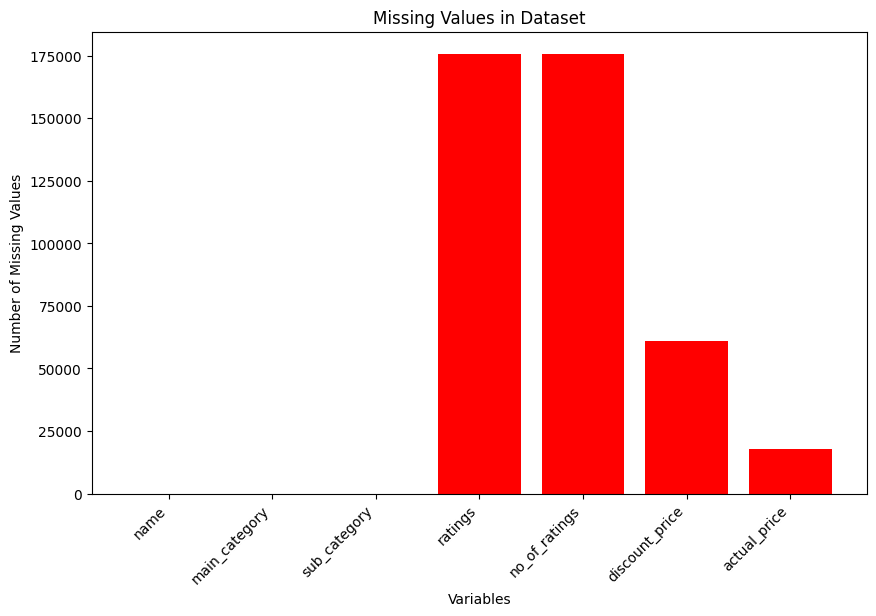

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='red')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

name               0.000000
main_category      0.000000
sub_category       0.000000
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64


In [17]:
filled_percentage = 100 - missing_percentage
print(filled_percentage)

name              100.000000
main_category     100.000000
sub_category      100.000000
ratings            68.129300
no_of_ratings      68.129300
discount_price     88.911410
actual_price       96.770579
dtype: float64


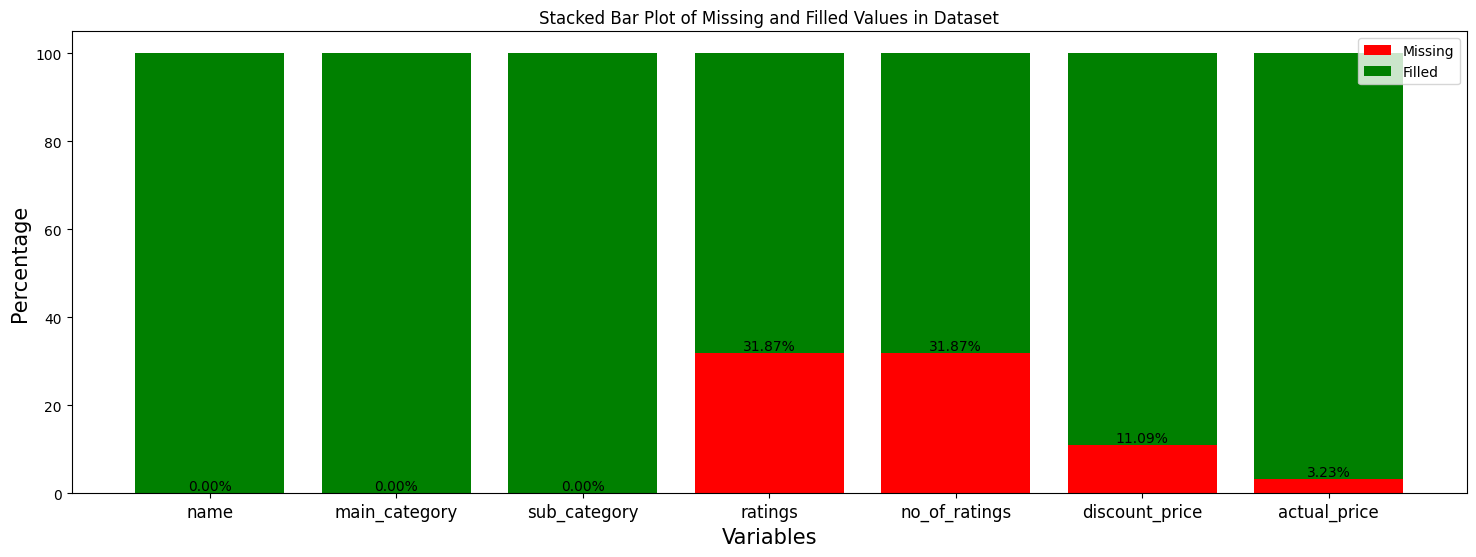

In [18]:
plt.figure(figsize=(18, 6))

bars1= plt.bar(missing_percentage.index, missing_percentage, label='Missing', color='red')
bars2= plt.bar(filled_percentage.index, filled_percentage, bottom=missing_percentage, label='Filled', color='green')

plt.xlabel('Variables',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Stacked Bar Plot of Missing and Filled Values in Dataset')
plt.xticks(fontsize=12)
plt.legend()

for bar1, bar2 in zip(bars1, bars2):
    yval = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')


###### .now we conclude that no column is having 70% missing values

## RATINGS

In [19]:
data['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [20]:
replace_dict = {
    np.nan:'0',
    'Get':'0',
    'FREE':'0',
    '₹68.99':'0', 
    '₹65':'0',
    '₹70':'0', 
    '₹100':'0',
    '₹99':'0', 
    '₹2.99':'0'

}
data['ratings'] = data['ratings'].replace(replace_dict)

### we successfully replace the abnormal values and NAN values to 0


### NO_OF_RATINGS

In [21]:
data['no_of_ratings'].unique()

array(['2,255', '2,948', '1,206', ..., '3,329', '7,141', '4,406'],
      dtype=object)

In [22]:
data['no_of_ratings'].isna().value_counts()

no_of_ratings
False    375791
True     175794
Name: count, dtype: int64

#### Replacing NAN with 0

In [23]:
replace_dict = {
    np.nan :"0"
}

data['no_of_ratings']=data['no_of_ratings'].replace(replace_dict)

#### Data has been cleaned with out null and abnormal values (replaced with 0 )

## DISCOUNT PRICE

In [24]:
data['discount_price'].unique()

array(['₹32,999', '₹46,490', '₹34,490', ..., '₹3,712.10', '₹1,429.60',
       '₹651.01'], dtype=object)

In [25]:
data['discount_price'].isna().value_counts()

discount_price
False    490422
True      61163
Name: count, dtype: int64

##### Here we can see some null values are there, let us replace with 0 for now

#### Removing rupees symbol

In [26]:
data['discount_price']=data['discount_price'].str.replace('[^0-9]', '', regex=True)


#### Replacing NAN values with 0.0

In [27]:
data['discount_price']=data['discount_price'].replace(np.nan,0.0)

In [28]:
data['discount_price'].isna().value_counts()

discount_price
False    551585
Name: count, dtype: int64

#### Null values are replaced with 0 , now there is no null values

## ACTUAL PRICE

In [29]:
data['actual_price'].isna().value_counts()

actual_price
False    533772
True      17813
Name: count, dtype: int64

#### Here, We can observe some null values

In [30]:
data['actual_price'].unique()

array(['₹58,990', '₹75,990', '₹61,990', ..., '₹608.97', '₹4,792',
       '₹8,023.60'], dtype=object)

#### Removing rupees symbol

In [31]:
data['actual_price']=data['actual_price'].str.replace('[^0-9]', '', regex=True)


data['actual_price'].unique()


#### Replace NAN with 0.0

In [32]:
data['actual_price']=data['actual_price'].replace(np.nan,0.0)


#### We successfully replace the null values with 0


In [33]:
data['actual_price'].isna().value_counts()


actual_price
False    551585
Name: count, dtype: int64

#### Null values are replaced with 0 , now there is no null values

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   ratings         551585 non-null  object
 4   no_of_ratings   551585 non-null  object
 5   discount_price  551585 non-null  object
 6   actual_price    551585 non-null  object
dtypes: object(7)
memory usage: 29.5+ MB


In [35]:
data.isnull().sum()

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [36]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

name              0.0
main_category     0.0
sub_category      0.0
ratings           0.0
no_of_ratings     0.0
discount_price    0.0
actual_price      0.0
dtype: float64


In [37]:
filled_percentage = 100 - missing_percentage
print(filled_percentage)

name              100.0
main_category     100.0
sub_category      100.0
ratings           100.0
no_of_ratings     100.0
discount_price    100.0
actual_price      100.0
dtype: float64


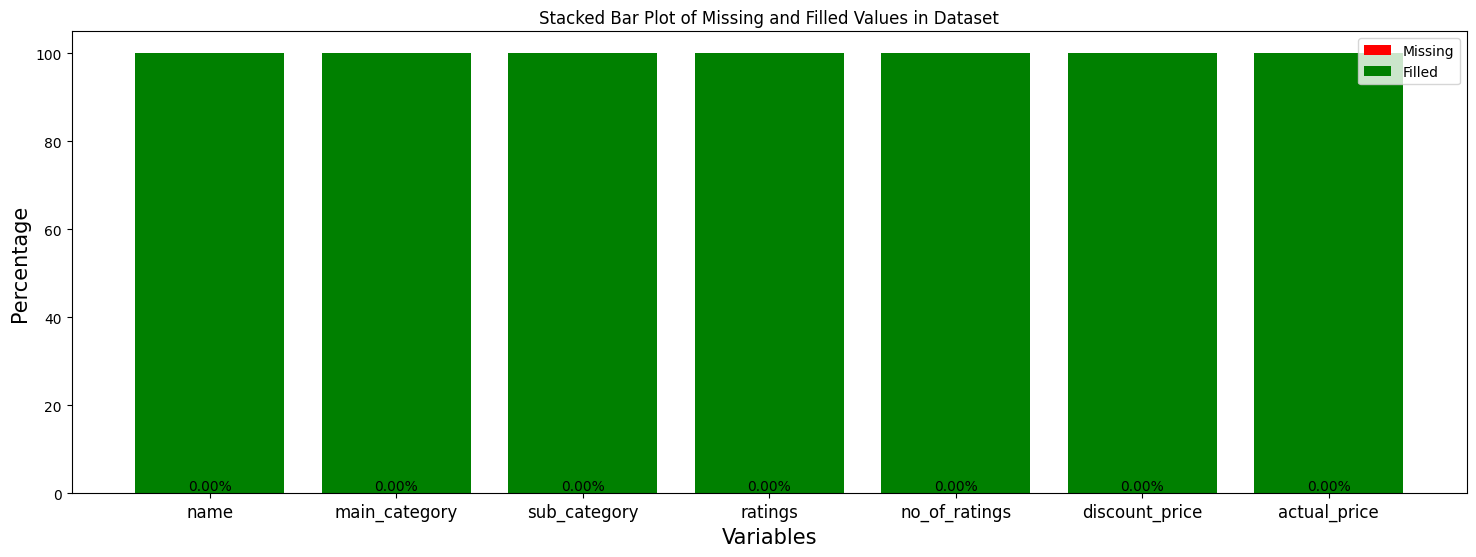

In [38]:
plt.figure(figsize=(18, 6))

bars1= plt.bar(missing_percentage.index, missing_percentage, label='Missing', color='red')
bars2= plt.bar(filled_percentage.index, filled_percentage, bottom=missing_percentage, label='Filled', color='green')

plt.xlabel('Variables',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Stacked Bar Plot of Missing and Filled Values in Dataset')
plt.xticks(fontsize=12)
plt.legend()

for bar1, bar2 in zip(bars1, bars2):
    yval = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

### Changing dtypes according to the data

## Ratings column


In [39]:
data['ratings']=data['ratings'].astype(float)

## No_of_Ratings Column


In [40]:
def convert_to_int(value):
    try:
        return int(value.replace(',', '').replace('Only left in stock.', '').strip())
    except (ValueError, AttributeError):
        return 0  # Return 0 for non-convertible values

# Apply the custom function to the column
data['no_of_ratings'] = data['no_of_ratings'].apply(convert_to_int)

## Discount_price column

In [41]:
data['discount_price'] = data['discount_price'].astype(float)

## Actual_price column

In [42]:
data['actual_price'] = data['actual_price'].astype(float)

In [43]:
data.drop_duplicates()

name     main_category  \
0       Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...        appliances   
1       LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...        appliances   
2       LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...        appliances   
3       LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...        appliances   
4       Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...        appliances   
...                                                   ...               ...   
551580                Adidas Regular Fit Men's Track Tops  sports & fitness   
551581          Redwolf Noice Toit Smort - Hoodie (Black)  sports & fitness   
551582     Redwolf Schrute Farms B&B - Hoodie (Navy Blue)  sports & fitness   
551583                                    Puma Men Shorts  sports & fitness   
551584  Mothercare Printed Cotton Elastane Girls Infan...  sports & fitness   

            sub_category  ratings  no_of_ratings  discount_price  actual_price  
0       Air Conditioners      4.2           2255         32999.0       58990.0  
1       Air Conditioners      4.2           2948         46490.0       75990.0  
2       Air Conditioners      4.2           1206         34490.0       61990.0  
3       Air Conditioners      4.0             69         37990.0       68990.0  
4       Air Conditioners      4.1            630         34490.0       67790.0  
...                  ...      ...            ...             ...           ...  
551580              Yoga      3.2              9          3449.0        4599.0  
551581              Yoga      2.0              2          1199.0        1999.0  
551582              Yoga      4.0              1          1199.0        1999.0  
551583              Yoga      4.4             37             0.0           0.0  
551584              Yoga      4.6              5          1039.0        1299.0  

[515534 rows x 7 columns]

#### No duplicate rows found. (becuase no change in rows)

## DATA CLEANING WAS COMPLETED

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            551585 non-null  object 
 1   main_category   551585 non-null  object 
 2   sub_category    551585 non-null  object 
 3   ratings         551585 non-null  float64
 4   no_of_ratings   551585 non-null  int64  
 5   discount_price  551585 non-null  float64
 6   actual_price    551585 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 29.5+ MB


#### We change the dtypes and equalize the content

In [45]:
data.describe()

ratings  no_of_ratings  discount_price  actual_price
count  551585.000000  551585.000000    5.515850e+05  5.515850e+05
mean        2.567621     563.311245    6.258484e+03  4.669279e+04
std         1.905329    7092.573805    6.774411e+04  1.333252e+07
min         0.000000       0.000000    0.000000e+00  0.000000e+00
25%         0.000000       0.000000    2.990000e+02  8.990000e+02
50%         3.500000       4.000000    5.990000e+02  1.499000e+03
75%         4.100000      49.000000    1.340000e+03  2.999000e+03
max         5.000000  589547.000000    1.065632e+07  9.900000e+09

In [46]:
missing_values= data.isnull().sum()

In [47]:
print(missing_values)

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


### RATING COLUMN

In [48]:
data['ratings'].value_counts(normalize=True)*100


ratings
0.0    33.000716
4.0     6.637055
5.0     5.960097
3.9     4.912208
3.8     4.587688
4.1     4.497947
3.7     4.022952
4.2     3.936655
3.6     3.532003
4.3     3.190986
3.5     3.189898
4.4     2.503513
3.4     2.357932
4.5     2.287589
3.0     2.138746
3.3     1.977030
4.6     1.513457
3.2     1.481005
1.0     1.472121
3.1     1.181142
4.7     0.972652
2.9     0.750383
2.0     0.567999
2.8     0.551864
2.7     0.457409
2.5     0.439280
4.8     0.424776
2.6     0.362591
2.4     0.227164
2.3     0.174406
2.2     0.137966
2.1     0.115848
4.9     0.094455
1.5     0.087747
1.9     0.064904
1.8     0.058015
1.7     0.040792
1.4     0.038253
1.6     0.031002
1.3     0.016679
1.2     0.004895
1.1     0.000181
Name: proportion, dtype: float64

#### Above we convert abnormal values to 0.

#### It has the highest percentage so that we need to change them into 3.5 which is median of all

In [49]:
data['ratings']=np.where(data['ratings']==0.0,data['ratings'].median(),data['ratings'])

In [50]:
data['ratings'].value_counts(normalize=True)*100

ratings
3.5    36.190614
4.0     6.637055
5.0     5.960097
3.9     4.912208
3.8     4.587688
4.1     4.497947
3.7     4.022952
4.2     3.936655
3.6     3.532003
4.3     3.190986
4.4     2.503513
3.4     2.357932
4.5     2.287589
3.0     2.138746
3.3     1.977030
4.6     1.513457
3.2     1.481005
1.0     1.472121
3.1     1.181142
4.7     0.972652
2.9     0.750383
2.0     0.567999
2.8     0.551864
2.7     0.457409
2.5     0.439280
4.8     0.424776
2.6     0.362591
2.4     0.227164
2.3     0.174406
2.2     0.137966
2.1     0.115848
4.9     0.094455
1.5     0.087747
1.9     0.064904
1.8     0.058015
1.7     0.040792
1.4     0.038253
1.6     0.031002
1.3     0.016679
1.2     0.004895
1.1     0.000181
Name: proportion, dtype: float64

## NO_OF_RATINGS

In [51]:
data['no_of_ratings'].value_counts(normalize=True)*100


no_of_ratings
0        33.012138
1         7.218470
2         4.484712
3         3.282359
4         2.606307
           ...    
20396     0.000181
4615      0.000181
8907      0.000181
18650     0.000181
16005     0.000181
Name: proportion, Length: 8285, dtype: float64

In [52]:
data['no_of_ratings']=np.where(data['no_of_ratings']==0.0,data['no_of_ratings'].median(),data['no_of_ratings'])

In [53]:
data['no_of_ratings'].value_counts(normalize=True)*100


no_of_ratings
4.0        35.618445
1.0         7.218470
2.0         4.484712
3.0         3.282359
5.0         2.111189
             ...    
3591.0      0.000181
5627.0      0.000181
16199.0     0.000181
9196.0      0.000181
8615.0      0.000181
Name: proportion, Length: 8284, dtype: float64

## DISCOUNT PRICE

In [54]:
data['discount_price'].value_counts(normalize=True)*100


discount_price
0.0         11.088590
499.0        3.308284
299.0        2.780532
399.0        2.630601
999.0        2.356844
              ...    
50192.0      0.000181
82080.0      0.000181
243470.0     0.000181
54209.0      0.000181
129735.0     0.000181
Name: proportion, Length: 26677, dtype: float64

In [55]:
data['discount_price']=np.where(data['discount_price']==0.0,data['discount_price'].median(),data['discount_price'])

In [56]:
data['discount_price'].value_counts(normalize=True)*100


discount_price
599.0       13.220628
499.0        3.308284
299.0        2.780532
399.0        2.630601
999.0        2.356844
              ...    
107550.0     0.000181
39767.0      0.000181
39333.0      0.000181
54849.0      0.000181
91088.0      0.000181
Name: proportion, Length: 26676, dtype: float64

## ACTUAL PRICE 

In [57]:
data['actual_price'].value_counts(normalize=True)*100


actual_price
999.0       8.842517
1999.0      4.676523
1499.0      3.409991
0.0         3.229965
499.0       2.611746
              ...   
18785.0     0.000181
21068.0     0.000181
814624.0    0.000181
22675.0     0.000181
16925.0     0.000181
Name: proportion, Length: 23124, dtype: float64

In [58]:
data['actual_price']=np.where(data['actual_price']==0.0,data['actual_price'].median(),data['actual_price'])

In [59]:
data['actual_price'].value_counts(normalize=True)*100


actual_price
999.0       8.842517
1499.0      6.639956
1999.0      4.676523
499.0       2.611746
1299.0      2.550468
              ...   
18785.0     0.000181
21068.0     0.000181
814624.0    0.000181
22675.0     0.000181
16925.0     0.000181
Name: proportion, Length: 23123, dtype: float64

## ADDING EXTRA COLUMNS FOR BETTER INSIGHTS

In [60]:
data.columns

Index(['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price'],
      dtype='object')

#### Sales percentage
#### Discount Amount
#### Rating level
#### Discount percentage

## Sales Percentage

In [61]:
data['sales_per'] = ((data['discount_price']/data['actual_price'])*100).round(2)

## Discount Offered

In [62]:
data['Discount_Offered'] = data['actual_price']-data['discount_price']


## Rating level


In [63]:

conditions = [
    (data['ratings'] > 4.0),
    (data['ratings'] > 3.2),
]

choices = ['Top rated', 'Average']

data['Rating_level'] = np.select(conditions, choices, default='Low')

## Discount percentage

In [64]:
data['Discount_per'] = 1- data['discount_price']/data['actual_price']

In [65]:
data['discount_price'].max()

np.float64(10656317.0)

In [66]:
data['discount_price'].min()

np.float64(8.0)

## Brand Name

In [67]:
data['Brand_Name'] = data['name'].str.split(" ").str[0]

In [68]:
columns = ['name','Brand_Name', 'main_category', 'sub_category','actual_price','discount_price',
           'Discount_Offered', 'Discount_per' ,'sales_per',
           'ratings', 'Rating_level','no_of_ratings' ]
data=data[columns]


In [69]:
data.select_dtypes(include=['object','category'])

name  Brand_Name  \
0       Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...       Lloyd   
1       LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...          LG   
2       LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...          LG   
3       LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...          LG   
4       Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...     Carrier   
...                                                   ...         ...   
551580                Adidas Regular Fit Men's Track Tops      Adidas   
551581          Redwolf Noice Toit Smort - Hoodie (Black)     Redwolf   
551582     Redwolf Schrute Farms B&B - Hoodie (Navy Blue)     Redwolf   
551583                                    Puma Men Shorts        Puma   
551584  Mothercare Printed Cotton Elastane Girls Infan...  Mothercare   

           main_category      sub_category Rating_level  
0             appliances  Air Conditioners    Top rated  
1             appliances  Air Conditioners    Top rated  
2             appliances  Air Conditioners    Top rated  
3             appliances  Air Conditioners      Average  
4             appliances  Air Conditioners    Top rated  
...                  ...               ...          ...  
551580  sports & fitness              Yoga          Low  
551581  sports & fitness              Yoga          Low  
551582  sports & fitness              Yoga      Average  
551583  sports & fitness              Yoga    Top rated  
551584  sports & fitness              Yoga    Top rated  

[551585 rows x 5 columns]

In [70]:
data.columns

Index(['name', 'Brand_Name', 'main_category', 'sub_category', 'actual_price',
       'discount_price', 'Discount_Offered', 'Discount_per', 'sales_per',
       'ratings', 'Rating_level', 'no_of_ratings'],
      dtype='object')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              551585 non-null  object 
 1   Brand_Name        551585 non-null  object 
 2   main_category     551585 non-null  object 
 3   sub_category      551585 non-null  object 
 4   actual_price      551585 non-null  float64
 5   discount_price    551585 non-null  float64
 6   Discount_Offered  551585 non-null  float64
 7   Discount_per      551585 non-null  float64
 8   sales_per         551585 non-null  float64
 9   ratings           551585 non-null  float64
 10  Rating_level      551585 non-null  object 
 11  no_of_ratings     551585 non-null  float64
dtypes: float64(7), object(5)
memory usage: 50.5+ MB


<Axes: title={'center': 'UNIQUE COUNTS'}>

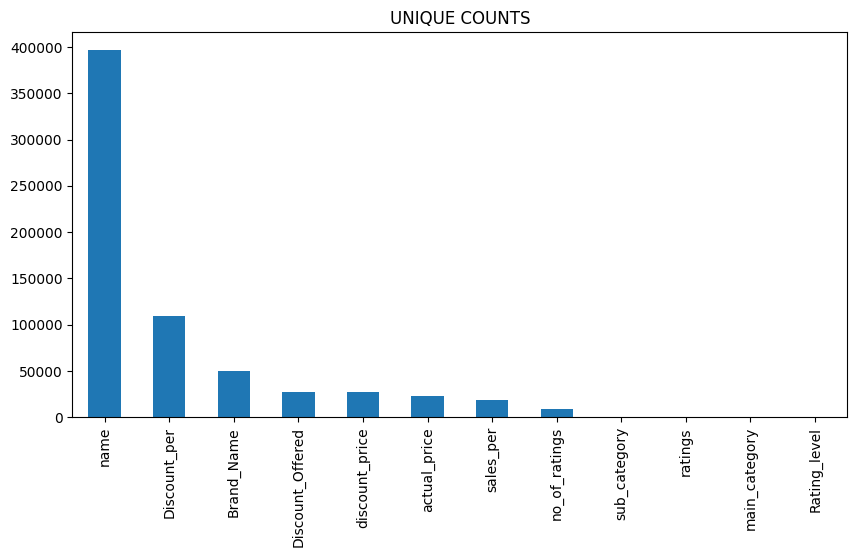

In [72]:
data.nunique().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),title = 'UNIQUE COUNTS')

## OUTLIERS DETECTION

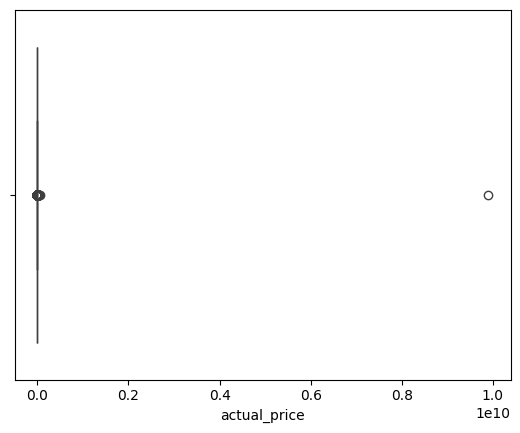

In [73]:
sb.boxplot(data=data,x='actual_price')
plt.show()

In [74]:
max(data['actual_price'])

9899999999.0

In [75]:
min(data['actual_price'])

4.0

In [76]:
x= np.quantile(data['actual_price'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)


Q1:  999.0
Q3:  2999.0


In [77]:
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

In [78]:
data['actual_price']=np.where(data['actual_price']>uw,uw,data['actual_price'])

In [79]:
data['actual_price']=np.where(data['actual_price']<lw,lw,data['actual_price'])

In [80]:
max(data['actual_price'])

5999.0

<Axes: xlabel='actual_price'>

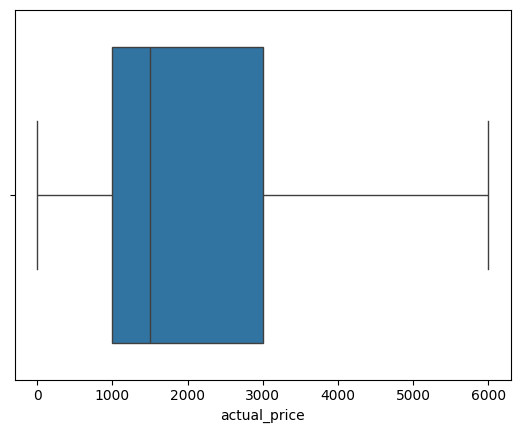

In [81]:
sb.boxplot(data=data,x='actual_price')

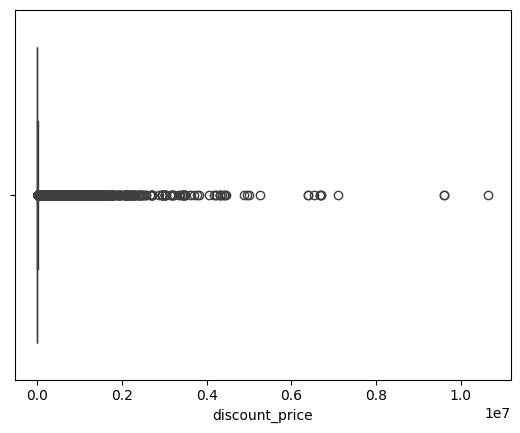

In [82]:
sb.boxplot(data=data,x='discount_price')
plt.show()

In [83]:
x= np.quantile(data['discount_price'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

Q1:  405.0
Q3:  1340.0


In [84]:
data['discount_price']=np.where(data['discount_price']>uw,uw,data['discount_price'])


In [85]:
data['discount_price']=np.where(data['discount_price']<lw,lw,data['discount_price'])

<Axes: xlabel='discount_price'>

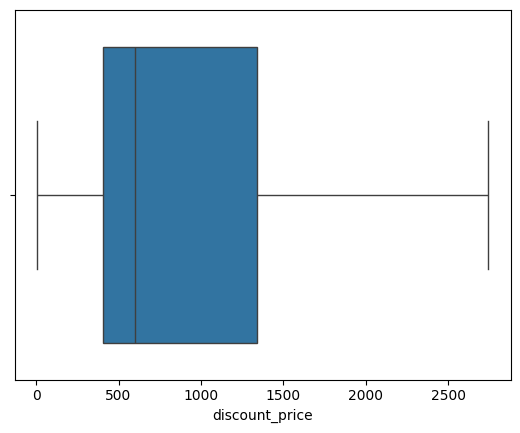

In [86]:
sb.boxplot(data=data,x='discount_price')

In [87]:
max(data['discount_price'])

2742.5

In [88]:
min(data['discount_price'])

8.0

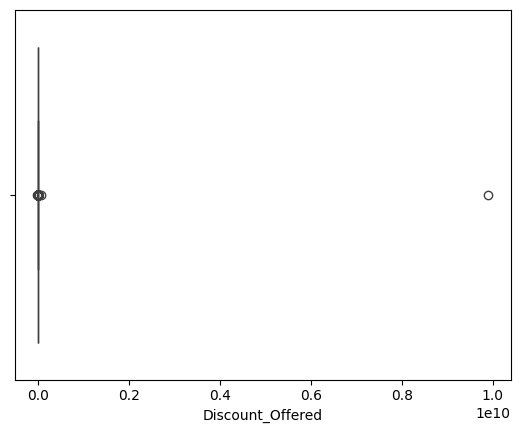

In [89]:
sb.boxplot(data=data,x='Discount_Offered')
plt.show()

In [90]:
x= np.quantile(data['Discount_Offered'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

Q1:  375.0
Q3:  1665.0


In [91]:
data['Discount_Offered']=np.where(data['Discount_Offered']>uw,uw,data['Discount_Offered'])

In [92]:
data['Discount_Offered']=np.where(data['Discount_Offered']<lw,lw,data['Discount_Offered'])

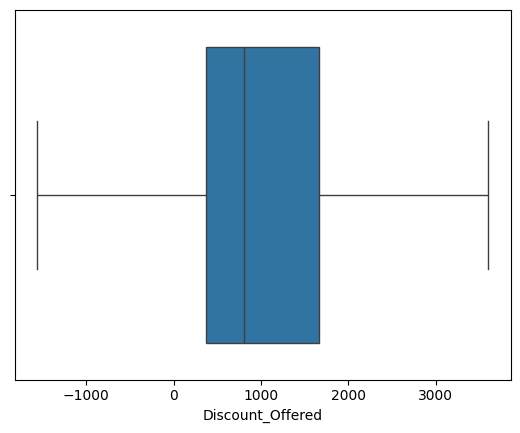

In [93]:
sb.boxplot(data=data,x='Discount_Offered')
plt.show()

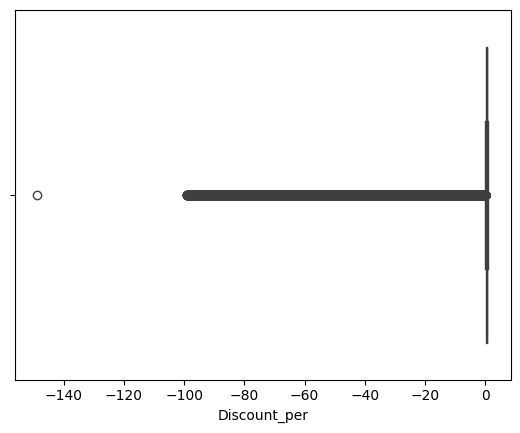

In [94]:
sb.boxplot(data=data,x='Discount_per')
plt.show()

In [95]:
x= np.quantile(data['Discount_per'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

Q1:  0.3337041156840934
Q3:  0.6653326663331666


In [96]:
data['Discount_per']=np.where(data['Discount_per']>uw,uw,data['Discount_per'])

In [97]:
data['Discount_per']=np.where(data['Discount_per']<lw,lw,data['Discount_per'])

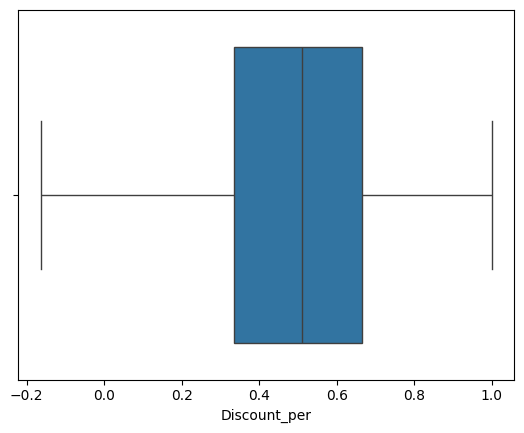

In [98]:
sb.boxplot(data=data,x='Discount_per')
plt.show()

In [99]:
data.columns


Index(['name', 'Brand_Name', 'main_category', 'sub_category', 'actual_price',
       'discount_price', 'Discount_Offered', 'Discount_per', 'sales_per',
       'ratings', 'Rating_level', 'no_of_ratings'],
      dtype='object')

In [100]:
data['sales_per'].unique()

array([  55.94,   61.18,   55.64, ..., 7425.69, 3972.21, 2713.67])

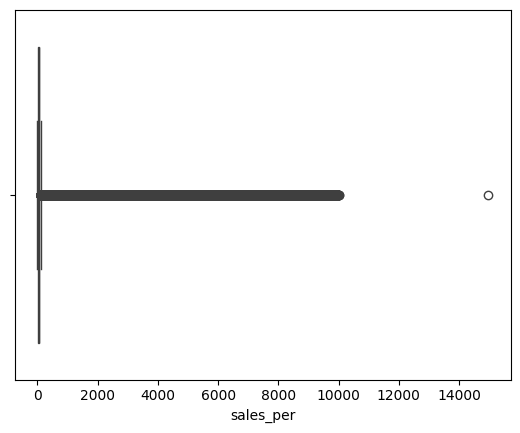

In [101]:
sb.boxplot(data=data,x='sales_per')
plt.show()

In [102]:
x= np.quantile(data['sales_per'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

Q1:  33.47
Q3:  66.63


In [103]:
data['sales_per']=np.where(data['sales_per']>uw,uw,data['sales_per'])
data['sales_per']=np.where(data['sales_per']<lw,lw,data['sales_per'])

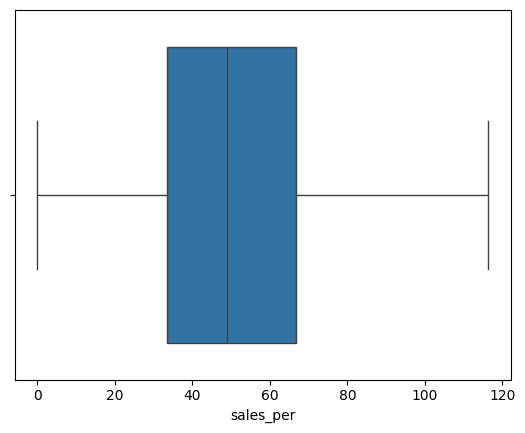

In [104]:
sb.boxplot(data=data,x='sales_per')
plt.show()

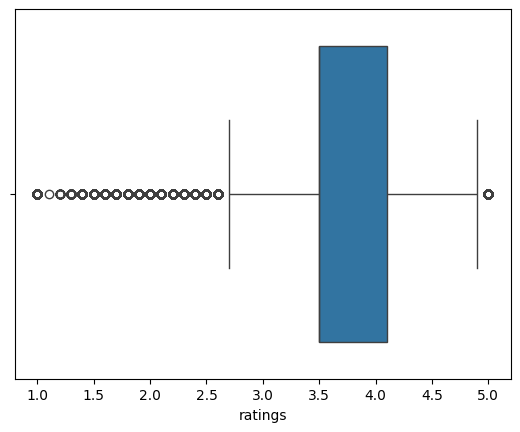

In [105]:
sb.boxplot(data=data, x='ratings')
plt.show()


In [106]:
x= np.quantile(data['ratings'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

Q1:  3.5
Q3:  4.1


In [107]:
data['ratings']=np.where(data['ratings']>uw,uw,data['ratings'])
data['ratings']=np.where(data['ratings']<lw,lw,data['ratings'])

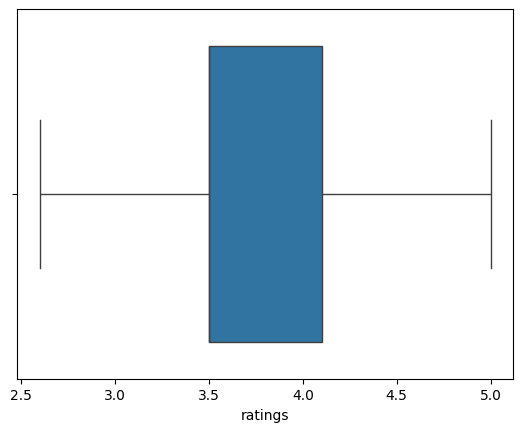

In [108]:
sb.boxplot(data=data, x='ratings')
plt.show()

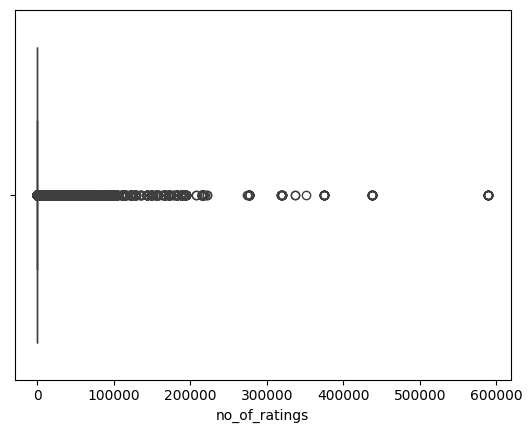

In [109]:
sb.boxplot(data=data, x='no_of_ratings')
plt.show()

In [110]:
x= np.quantile(data['no_of_ratings'],(0.25,0.75))
Q3=x[1]
Q1=x[0]
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR = Q3-Q1
uw= Q3+ 1.5*IQR
lw =Q1-1.5 * IQR

Q1:  4.0
Q3:  49.0


In [111]:
data['no_of_ratings']=np.where(data['no_of_ratings']>uw,uw,data['no_of_ratings'])
data['no_of_ratings']=np.where(data['no_of_ratings']<lw,lw,data['no_of_ratings'])

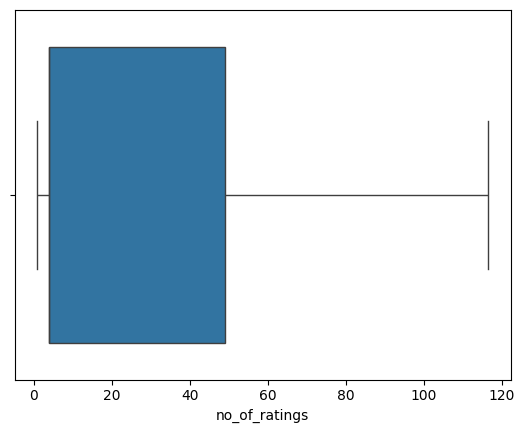

In [112]:
sb.boxplot(data=data, x='no_of_ratings')
plt.show()

In [113]:
data.describe()

actual_price  discount_price  Discount_Offered   Discount_per  \
count  551585.000000   551585.000000     551585.000000  551585.000000   
mean     2273.238997     1013.372030       1148.494404       0.482513   
std      1816.405651      842.392544       1165.108504       0.255003   
min         4.000000        8.000000      -1560.000000      -0.163739   
25%       999.000000      405.000000        375.000000       0.333704   
50%      1499.000000      599.000000        802.000000       0.510308   
75%      2999.000000     1340.000000       1665.000000       0.665333   
max      5999.000000     2742.500000       3600.000000       1.000000   

           sales_per        ratings  no_of_ratings  
count  551585.000000  551585.000000  551585.000000  
mean       51.748500       3.755464      32.351416  
std        25.499937       0.537424      44.047834  
min         0.000000       2.600000       1.000000  
25%        33.470000       3.500000       4.000000  
50%        48.970000       3.500000       4.000000  
75%        66.630000       4.100000      49.000000  
max       116.370000       5.000000     116.500000

# UNI-VARiATE ANALYSIS OF BRAND_NAME

### What are the top 10 brands with respective to their product counts?

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\4049702819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_brands.index, y=top_brands.values, palette='plasma')


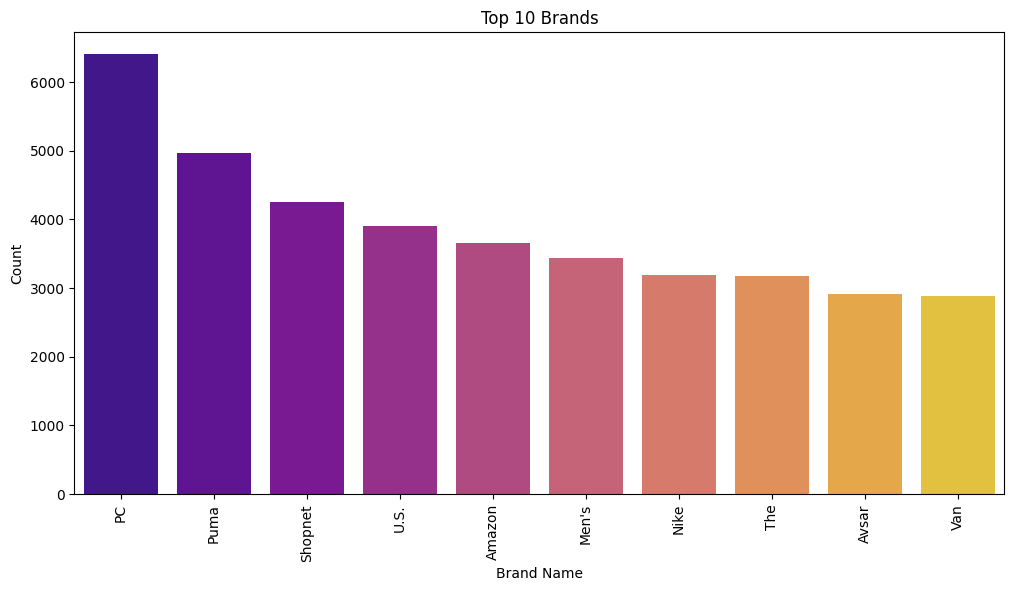

In [114]:
brand_counts = data['Brand_Name'].value_counts()
top_brands = brand_counts.head(10)  # Display top 10 brands
plt.figure(figsize=(12, 6))
sb.barplot(x=top_brands.index, y=top_brands.values, palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Top 10 Brands')
plt.show()

#### The given barchart demonstrates the top 10 brands which have high product count

## which company products are buying more?
### Ans:- PC Company products are buying more

## What are the bottom 10 brands with respective to thier Product counts?

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\1020797167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=low_brands.index, y=low_brands.values, palette='plasma')


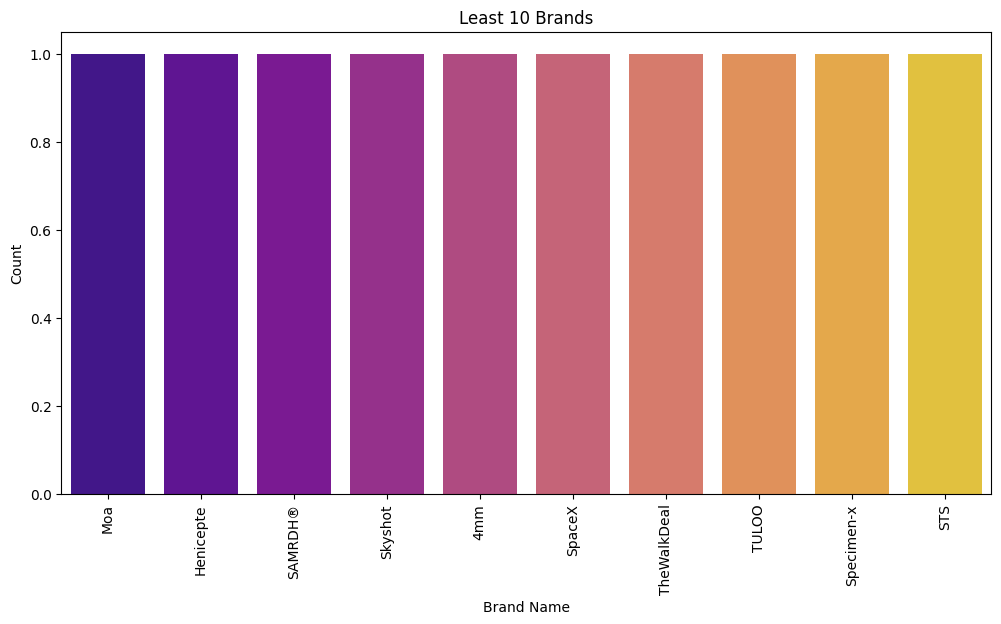

In [115]:
brand_counts = data['Brand_Name'].value_counts()
low_brands = brand_counts.tail(10)  # Display top 10 brands
plt.figure(figsize=(12, 6))
sb.barplot(x=low_brands.index, y=low_brands.values, palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Least 10 Brands')
plt.show()

## What are the main categories of the products in terms of their counts?

In [116]:
data['main_category'].value_counts().reset_index()

main_category   count
0               accessories  116141
1            men's clothing   76656
2          women's clothing   76512
3       tv, audio & cameras   68659
4               men's shoes   57456
5                appliances   33096
6                    stores   32903
7            home & kitchen   14568
8             kids' fashion   13488
9          sports & fitness   12648
10           bags & luggage   10416
11          beauty & health   10122
12          car & motorbike    7080
13     toys & baby products    6216
14            women's shoes    5472
15      industrial supplies    4104
16  grocery & gourmet foods    3312
17             pet supplies    1632
18                    music    1080
19      home, kitchen, pets      24

In [117]:
data['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\3322032771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


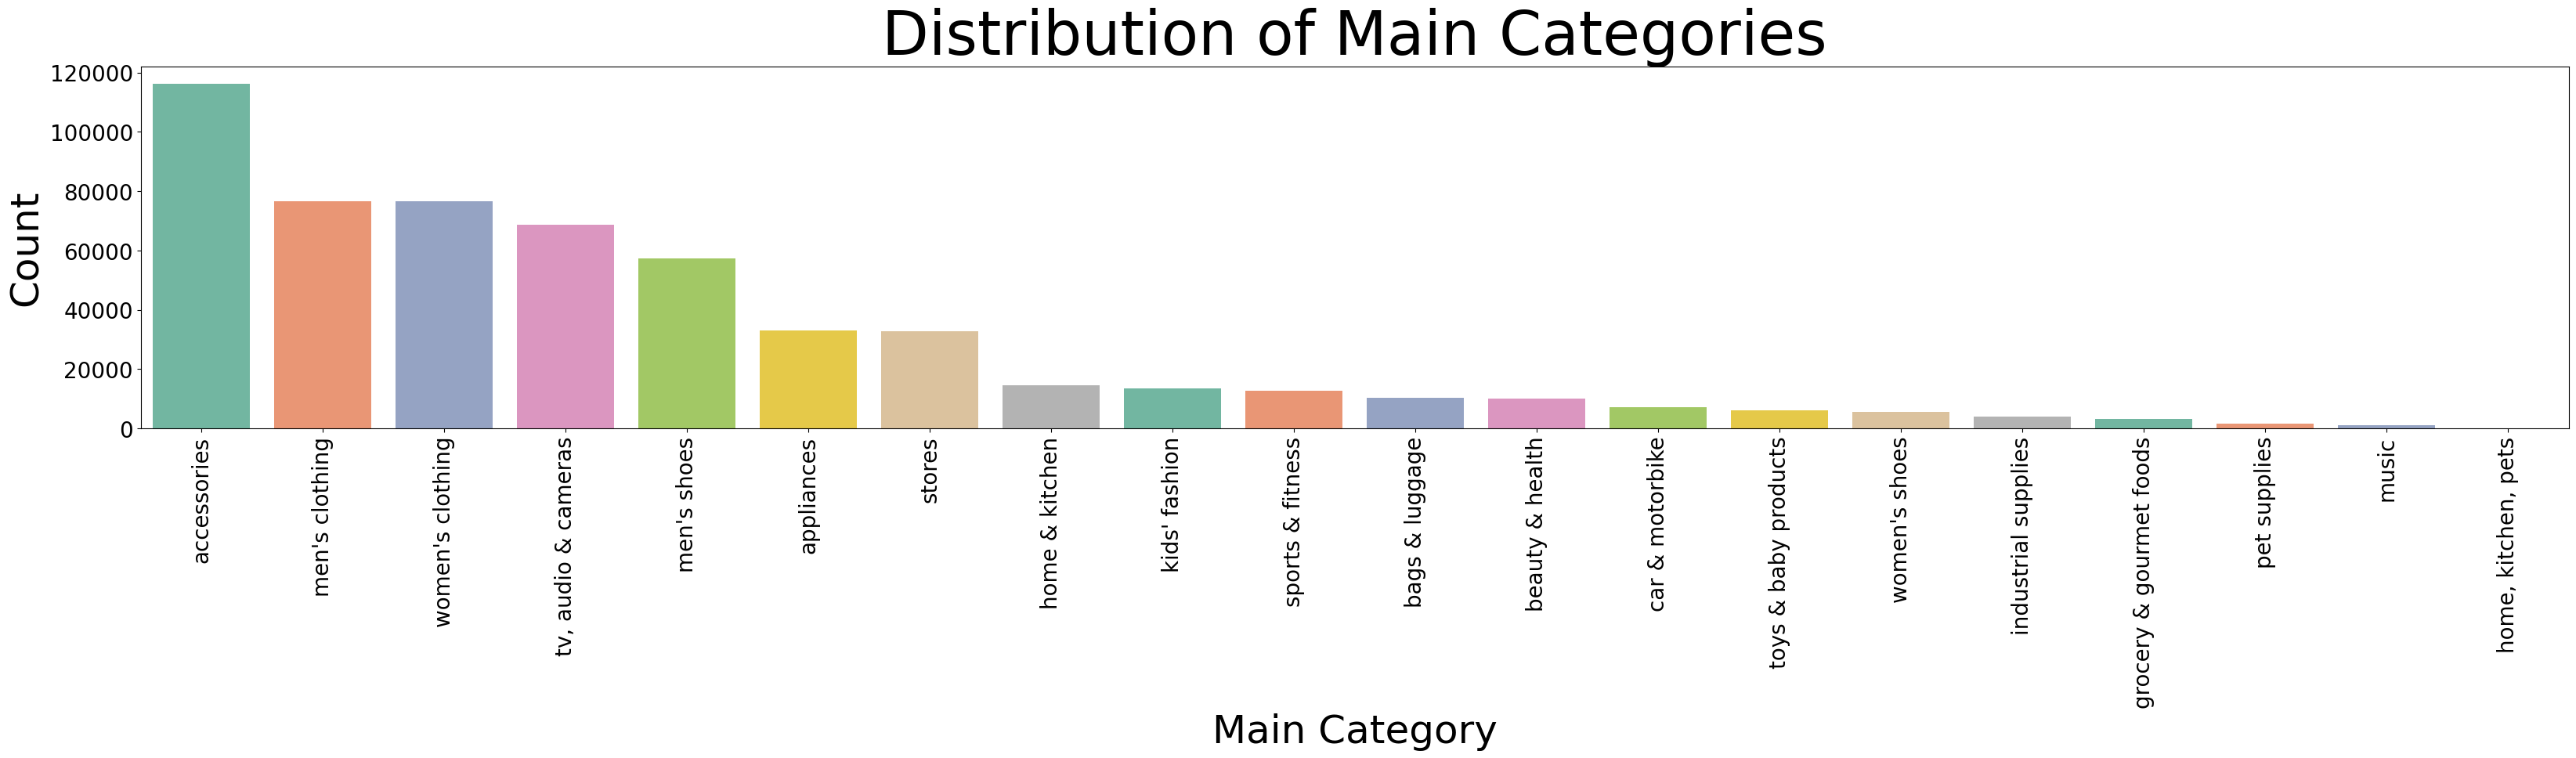

In [118]:

# Column: 'main_category' - Main Product Category
# Univariate analysis for categorical data
category_counts = data['main_category'].value_counts()
plt.figure(figsize=(40, 6))
sb.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Main Category',fontsize=36)
plt.ylabel('Count',fontsize=36)
plt.title('Distribution of Main Categories',fontsize=56)
plt.show()


In [119]:
main_cat=data['main_category'].value_counts().reset_index().head(10)
main_cat

main_category   count
0          accessories  116141
1       men's clothing   76656
2     women's clothing   76512
3  tv, audio & cameras   68659
4          men's shoes   57456
5           appliances   33096
6               stores   32903
7       home & kitchen   14568
8        kids' fashion   13488
9     sports & fitness   12648

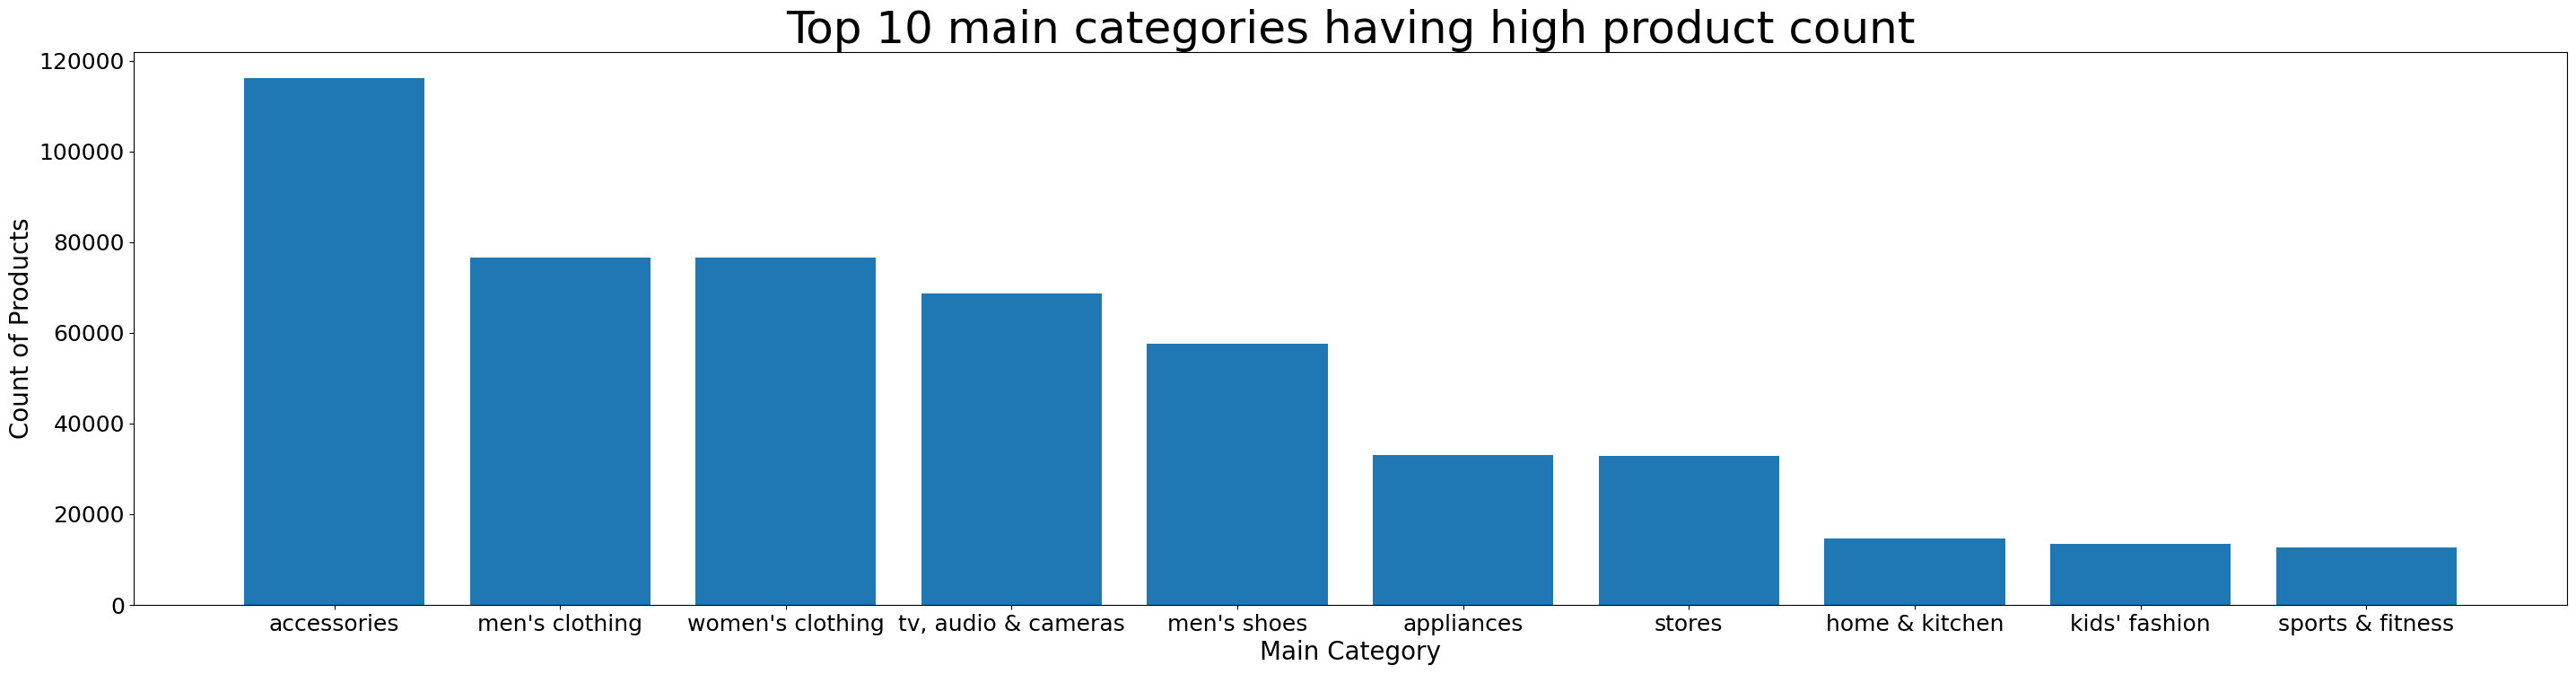

In [120]:
plt.figure(figsize=(35,8))
plt.bar(main_cat['main_category'],main_cat['count'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Top 10 main categories having high product count",fontsize=36)
plt.xlabel('Main Category', fontsize = 20 )
plt.ylabel('Count of Products',fontsize=20)
plt.show()

### Accessories have more no.of products in Main category

## What are the sub-categories of the products with respect to their product count?

In [121]:
data['sub_category'].value_counts().reset_index()

sub_category  count
0               Formal Shoes  19200
1               Sports Shoes  19200
2              Men's Fashion  19200
3               Western Wear  19200
4                     Shirts  19200
..                       ...    ...
107          STEM Toys Store     48
108    Fashion Sales & Deals     44
109  International Toy Store     24
110   Refurbished & Open Box     24
111       Toys Gifting Store     24

[112 rows x 2 columns]

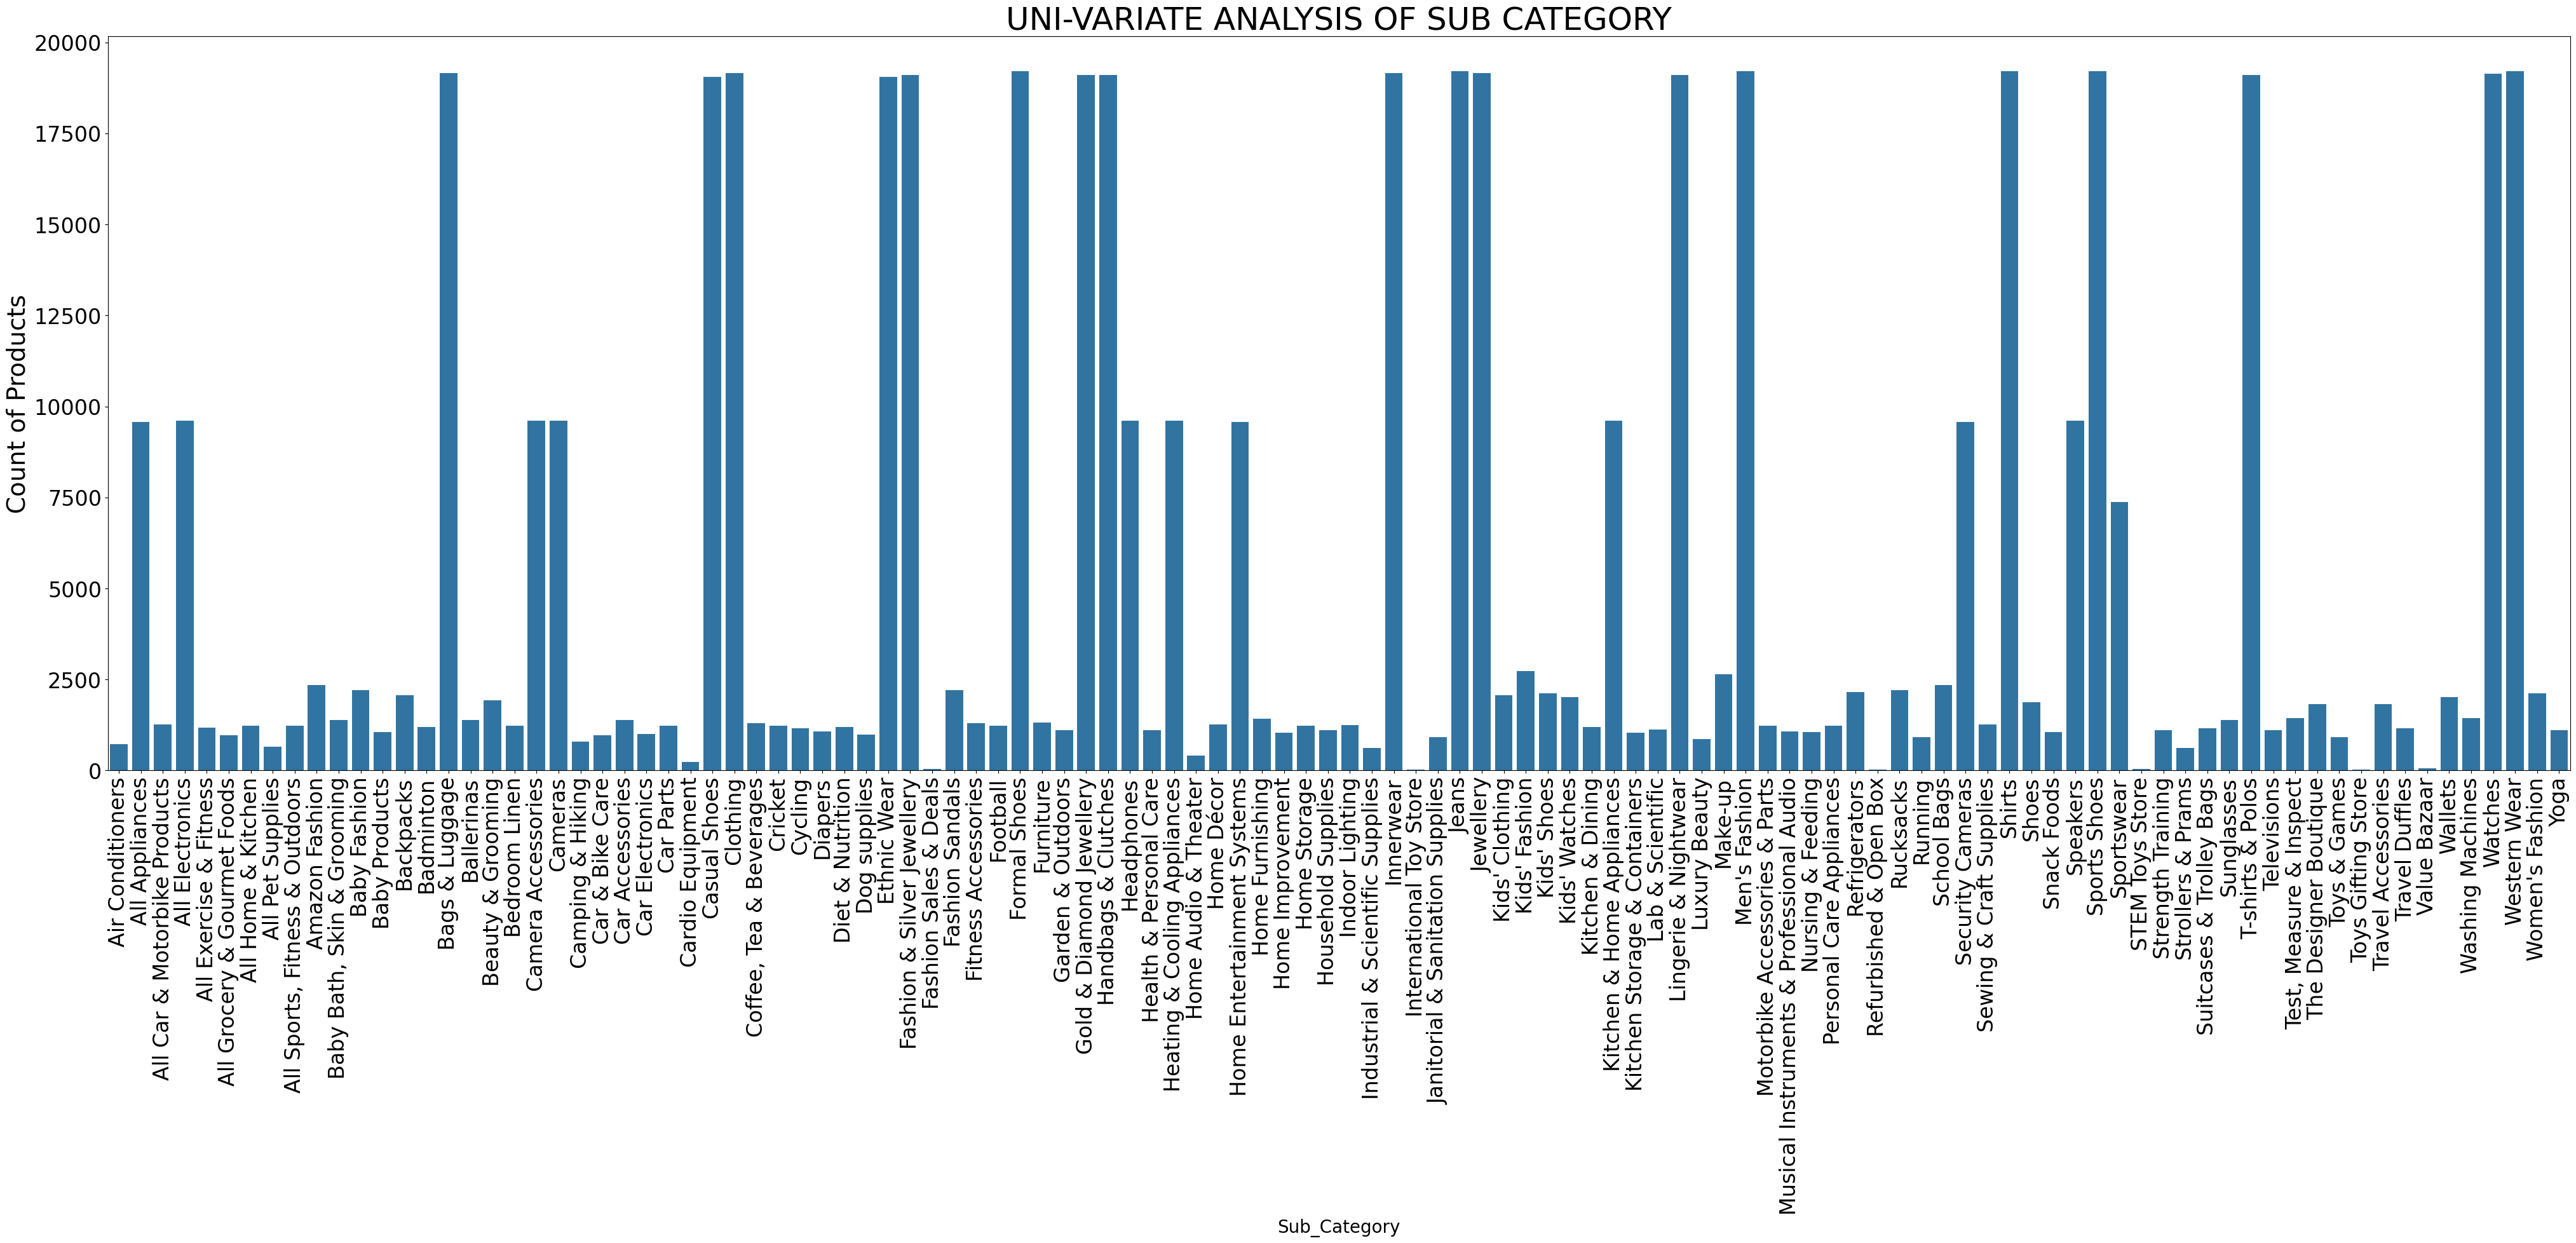

In [122]:
plt.figure(figsize=(50,15))
sb.countplot(data=data,x='sub_category')
plt.xticks(rotation=90,fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Sub_Category',fontsize=20)
plt.ylabel('Count of Products', fontsize=28)
plt.title("UNI-VARIATE ANALYSIS OF SUB CATEGORY",fontsize=36)
plt.show()


## Top 10 sub categories

In [123]:
sub_cat=data['sub_category'].value_counts().reset_index().head(10)
sub_cat

sub_category  count
0    Formal Shoes  19200
1    Sports Shoes  19200
2   Men's Fashion  19200
3    Western Wear  19200
4          Shirts  19200
5           Jeans  19200
6        Clothing  19152
7  Bags & Luggage  19152
8       Jewellery  19152
9       Innerwear  19152

In [124]:
sub_cat.sub_category.values

array(['Formal Shoes', 'Sports Shoes', "Men's Fashion", 'Western Wear',
       'Shirts', 'Jeans', 'Clothing', 'Bags & Luggage', 'Jewellery',
       'Innerwear'], dtype=object)

## What are the top 10 sub categories with respect to product count?

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\1868259483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_sub_categories.index, y=top_sub_categories.values, palette='tab20')


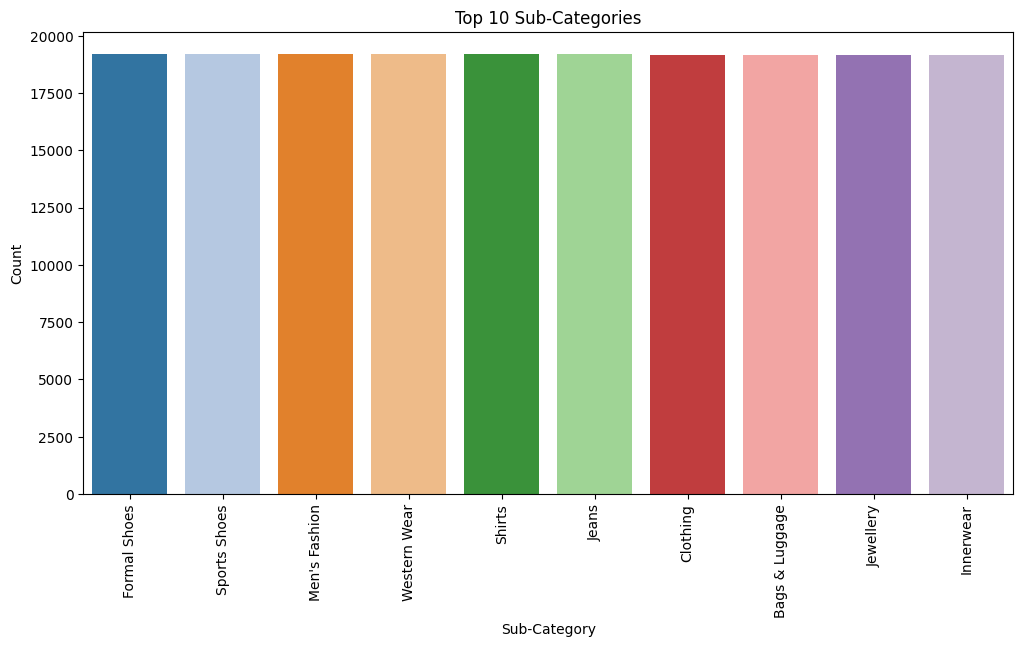

In [125]:
# Column: 'sub_category' - Sub-Category
# Univariate analysis for categorical data
sub_category_counts = data['sub_category'].value_counts()
top_sub_categories = sub_category_counts.head(10)  # Display top 10 sub-categories
plt.figure(figsize=(12, 6))
sb.barplot(x=top_sub_categories.index, y=top_sub_categories.values, palette='tab20')
plt.xticks(rotation=90)
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Top 10 Sub-Categories')
plt.show()


## Bottom 10 sub categories

In [126]:
sub_cat2=data['sub_category'].value_counts().reset_index().tail(10)
sub_cat2

sub_category  count
102  Industrial & Scientific Supplies    624
103                 Strollers & Prams    624
104              Home Audio & Theater    403
105                  Cardio Equipment    240
106                      Value Bazaar     66
107                   STEM Toys Store     48
108             Fashion Sales & Deals     44
109           International Toy Store     24
110            Refurbished & Open Box     24
111                Toys Gifting Store     24


## What are the bottom 10 sub categories with respect to product count?

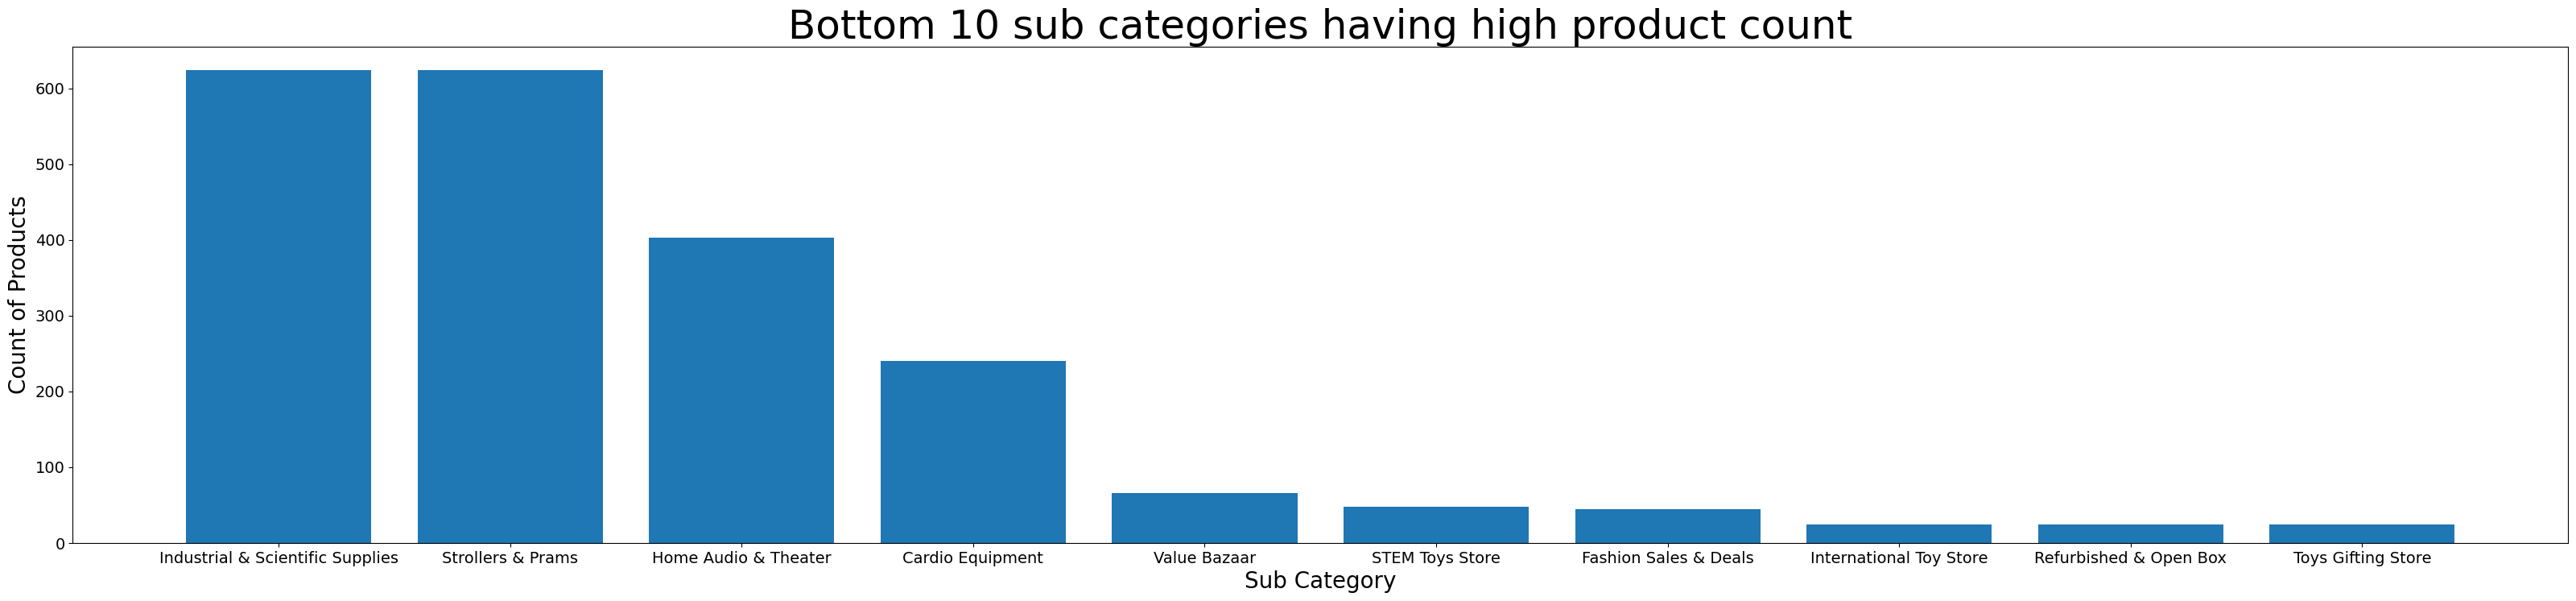

In [127]:
plt.figure(figsize=(40,8))
plt.bar(sub_cat2['sub_category'],sub_cat2['count'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Bottom 10 sub categories having high product count",fontsize=36)
plt.xlabel('Sub Category', fontsize = 20 )
plt.ylabel('Count of Products',fontsize=20)
plt.show()

In [128]:
data.columns

Index(['name', 'Brand_Name', 'main_category', 'sub_category', 'actual_price',
       'discount_price', 'Discount_Offered', 'Discount_per', 'sales_per',
       'ratings', 'Rating_level', 'no_of_ratings'],
      dtype='object')

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\3120281494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_names.index, y=top_names.values, palette='viridis')


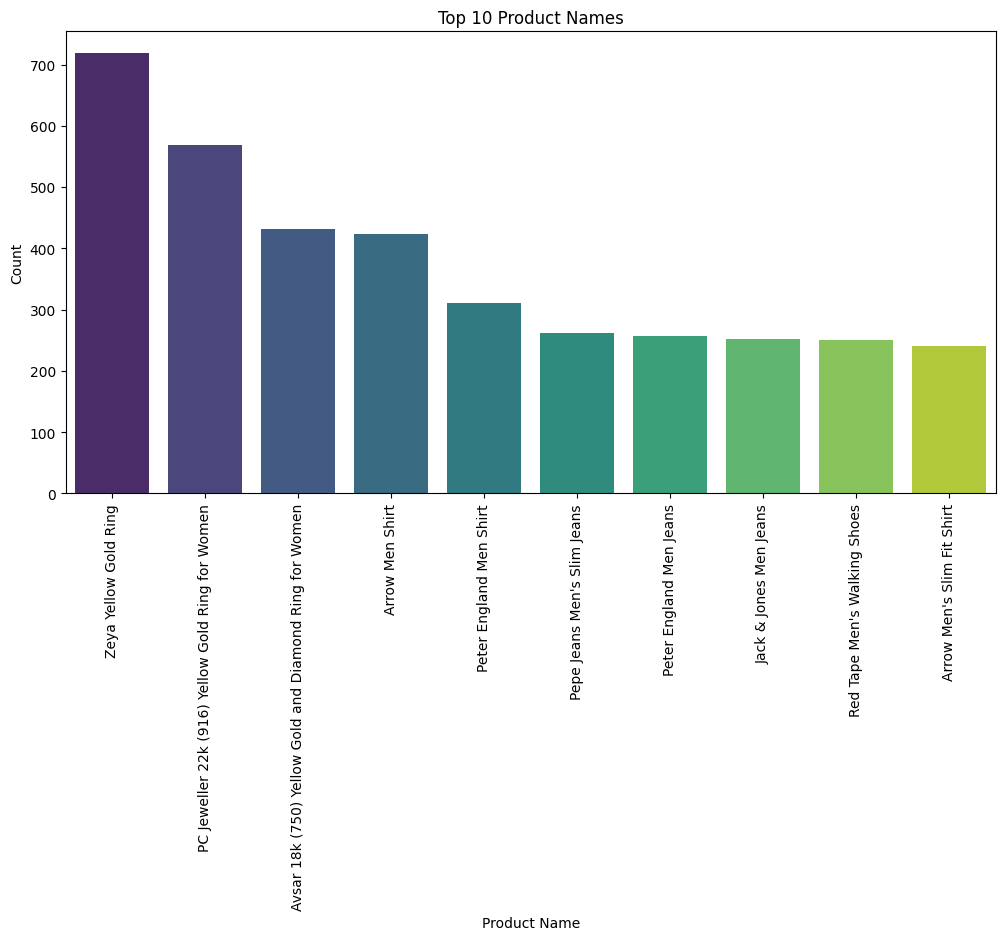

In [129]:
name_counts = data['name'].value_counts()
top_names = name_counts.head(10)  # Display top 10 product names
plt.figure(figsize=(12, 6))
sb.barplot(x=top_names.index, y=top_names.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Top 10 Product Names')
plt.show()


In [130]:
top_names.index

Index(['Zeya Yellow Gold Ring',
       'PC Jeweller 22k (916) Yellow Gold Ring for Women',
       'Avsar 18k (750) Yellow Gold and Diamond Ring for Women',
       'Arrow Men Shirt', 'Peter England Men Shirt',
       'Pepe Jeans Men's Slim Jeans', 'Peter England Men Jeans',
       'Jack & Jones Men Jeans', 'Red Tape Men's Walking Shoes',
       'Arrow Men's Slim Fit Shirt'],
      dtype='object', name='name')

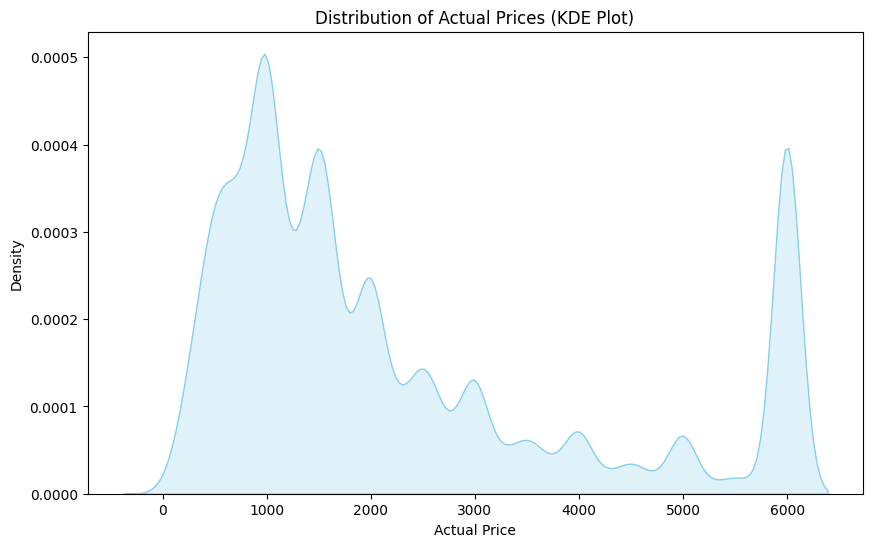

In [131]:
# Column: 'actual_price' - Actual Price
# Univariate analysis for numerical data (KDE plot)
plt.figure(figsize=(10, 6))
sb.kdeplot(data['actual_price'], color='skyblue', fill=True)
plt.xlabel('Actual Price')
plt.ylabel('Density')
plt.title('Distribution of Actual Prices (KDE Plot)')
plt.show()


##### The KDE plot of the ‘actual_price’ column shows that the distribution of actual prices appears to be bimodal, with two peaks around 1000 and 2500. This suggests that there are two groups in the data with different price ranges. The density is highest at these two peaks, indicating that most of the prices are around these values. The density decreases as the price increases or decreases from these values, indicating fewer data points in those ranges. This could imply that items priced around 1000 and 2500 are more common.

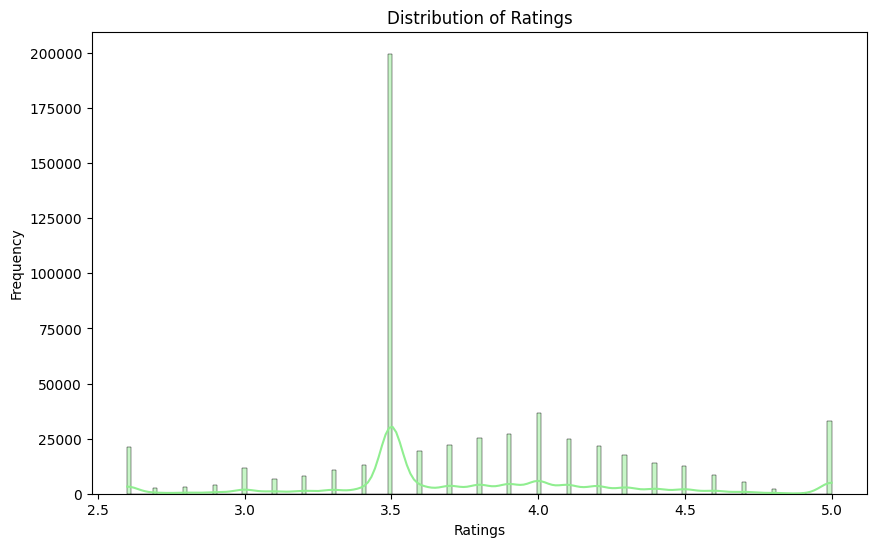

In [132]:

# Column: 'ratings' - Ratings (Numerical)
# Univariate analysis for numerical data (histogram)
plt.figure(figsize=(10, 6))
sb.histplot(data['ratings'], kde=True, color='lightgreen')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()



##### The histogram of the ratings column apperas that distribution be bimodal

In [133]:
data['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, 4.6, 3.3, 3.4, 3.7, 2.9, 5. ,
       4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.6, 2.8, 4.9])

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\467125733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=rating_level_counts.index, y=rating_level_counts.values, palette='Pastel1')


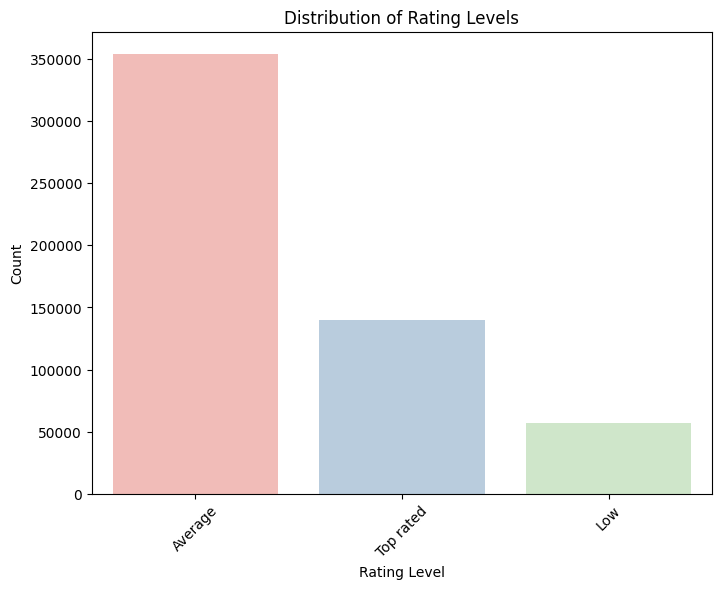

In [134]:

# Column: 'Rating_level' - Rating Level (Categorical)
# Univariate analysis for categorical data

rating_level_counts = data['Rating_level'].value_counts()
plt.figure(figsize=(8, 6))
sb.barplot(x=rating_level_counts.index, y=rating_level_counts.values, palette='Pastel1')
plt.xticks(rotation=45)
plt.xlabel('Rating Level')
plt.ylabel('Count')
plt.title('Distribution of Rating Levels')
plt.show()


## BI-VARIATE ANALYSIS

##### Most Popular Products:

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\954958819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=top_rated_products, x='ratings', y='name',palette='rainbow')


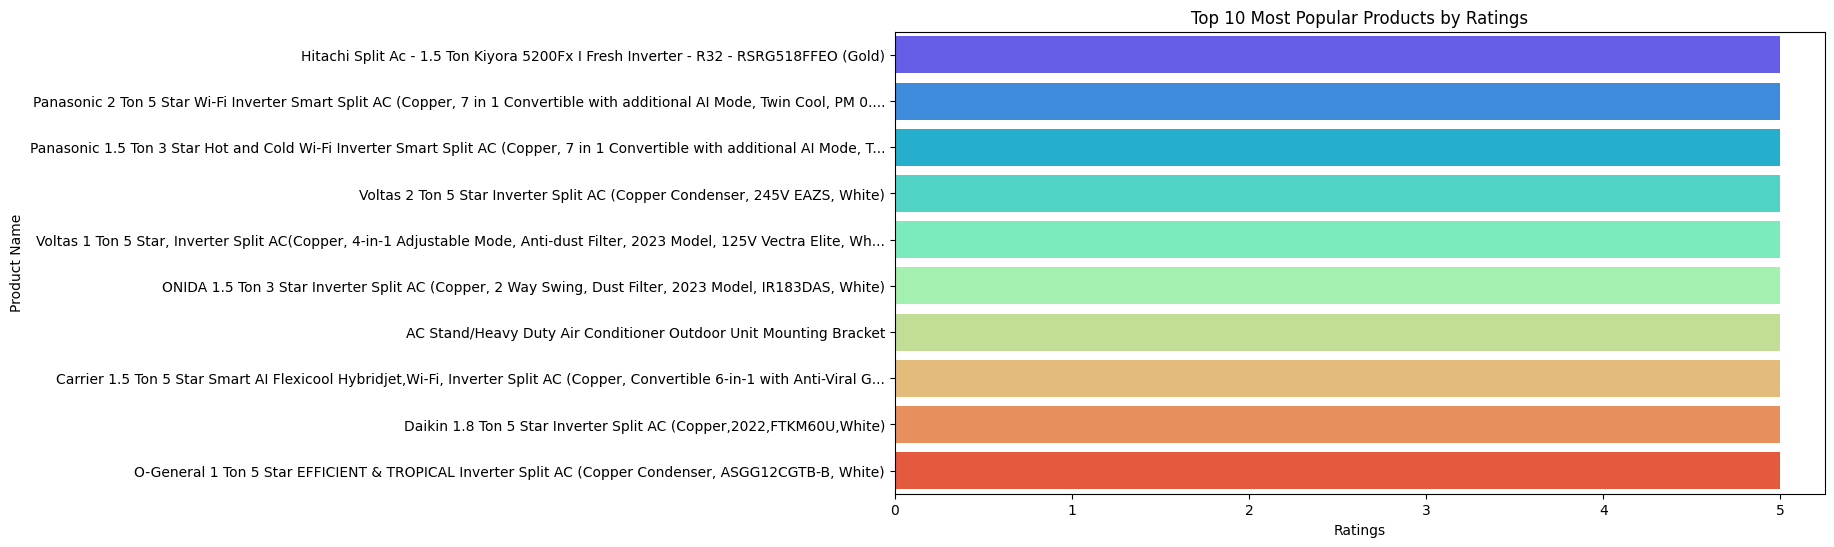

In [135]:
top_rated_products = data.nlargest(10, 'ratings')
plt.figure(figsize=(12, 6))
sb.barplot(data=top_rated_products, x='ratings', y='name',palette='rainbow')
plt.title('Top 10 Most Popular Products by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Product Name')
plt.show()

In [136]:
top_rated_products.name.values

array(['Hitachi Split Ac - 1.5 Ton Kiyora 5200Fx I Fresh Inverter - R32 - RSRG518FFEO (Gold)',
       'Panasonic 2 Ton 5 Star Wi-Fi Inverter Smart Split AC (Copper, 7 in 1 Convertible with additional AI Mode, Twin Cool, PM 0....',
       'Panasonic 1.5 Ton 3 Star Hot and Cold Wi-Fi Inverter Smart Split AC (Copper, 7 in 1 Convertible with additional AI Mode, T...',
       'Voltas 2 Ton 5 Star Inverter Split AC (Copper Condenser, 245V EAZS, White)',
       'Voltas 1 Ton 5 Star, Inverter Split AC(Copper, 4-in-1 Adjustable Mode, Anti-dust Filter, 2023 Model, 125V Vectra Elite, Wh...',
       'ONIDA 1.5 Ton 3 Star Inverter Split AC (Copper, 2 Way Swing, Dust Filter, 2023 Model, IR183DAS, White)',
       'AC Stand/Heavy Duty Air Conditioner Outdoor Unit Mounting Bracket',
       'Carrier 1.5 Ton 5 Star Smart AI Flexicool Hybridjet,Wi-Fi, Inverter Split AC (Copper, Convertible 6-in-1 with Anti-Viral G...',
       'Daikin 1.8 Ton 5 Star Inverter Split AC (Copper,2022,FTKM60U,White)',
       'O

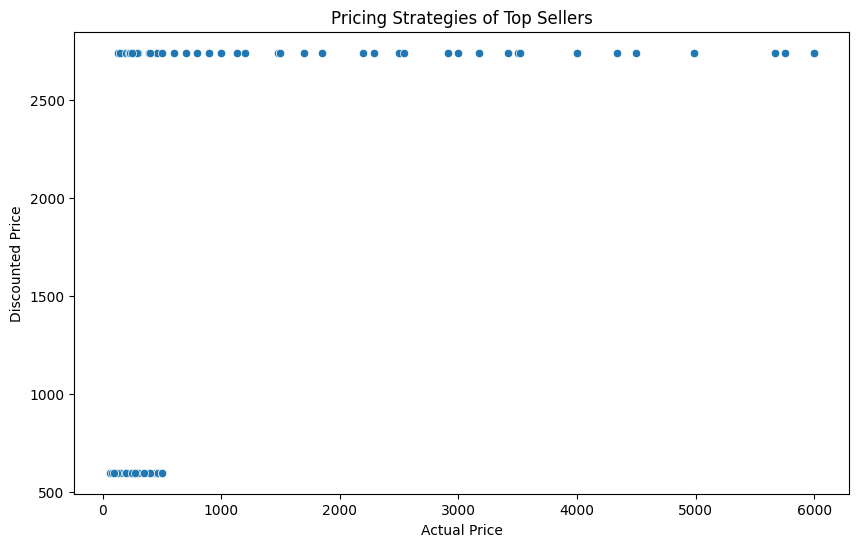

In [137]:
# Create a scatter plot to compare actual_price and discount_price for top-selling products
top_selling_products = data.nlargest(100, 'sales_per')  # Assuming you consider the top 100 products as top sellers
plt.figure(figsize=(10, 6))
sb.scatterplot(data=top_selling_products, x='actual_price', y='discount_price')
plt.title('Pricing Strategies of Top Sellers')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()
# Explain the pricing strategies you observe among top sellers.

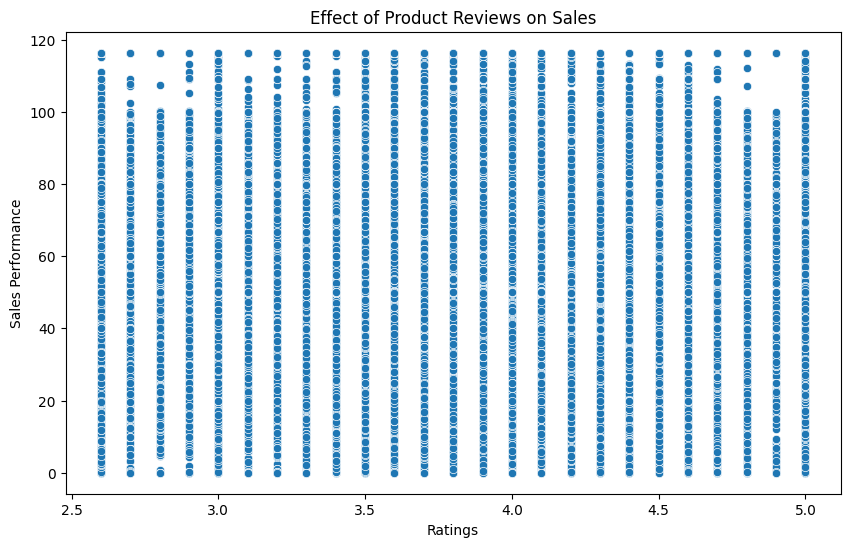

In [138]:
# Create a scatter plot to analyze the correlation between ratings and sales_per
plt.figure(figsize=(10, 6))
sb.scatterplot(data=data, x='ratings', y='sales_per')
plt.title('Effect of Product Reviews on Sales')
plt.xlabel('Ratings')
plt.ylabel('Sales Performance')
plt.show()
# Explain the relationship between ratings and sales performance.


C:\Users\karth\AppData\Local\Temp\ipykernel_21976\1141641215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=avg_ratings_by_category, x='ratings', y='main_category',palette='rainbow')


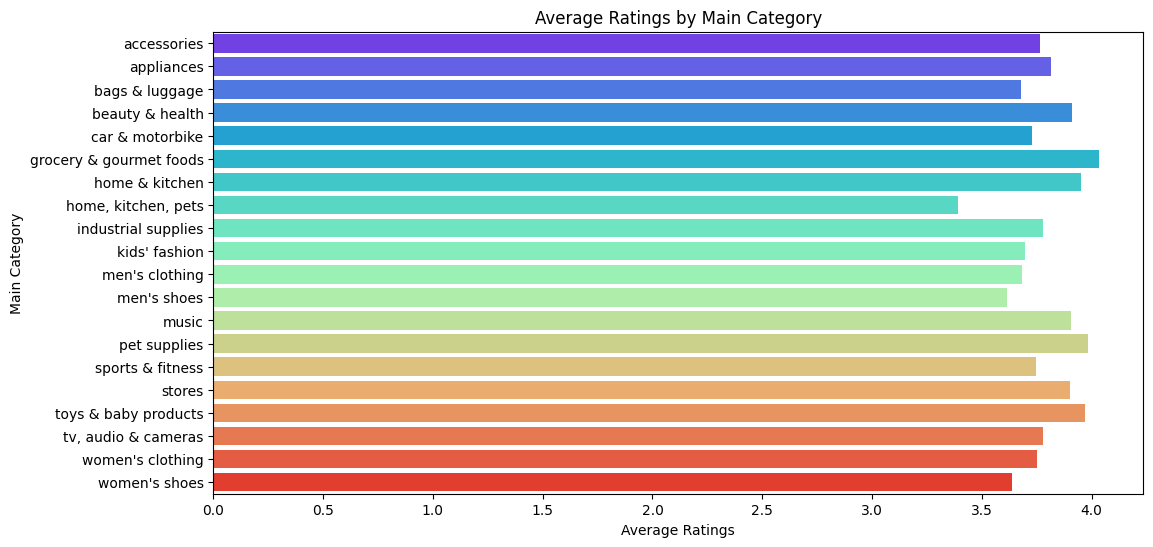

In [139]:
# Create a bar chart to show the average ratings by main_category
avg_ratings_by_category = data.groupby('main_category')['ratings'].mean().reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(data=avg_ratings_by_category, x='ratings', y='main_category',palette='rainbow')
plt.title('Average Ratings by Main Category')
plt.xlabel('Average Ratings')
plt.ylabel('Main Category')
plt.show()
# Explain which main categories have high average ratings.


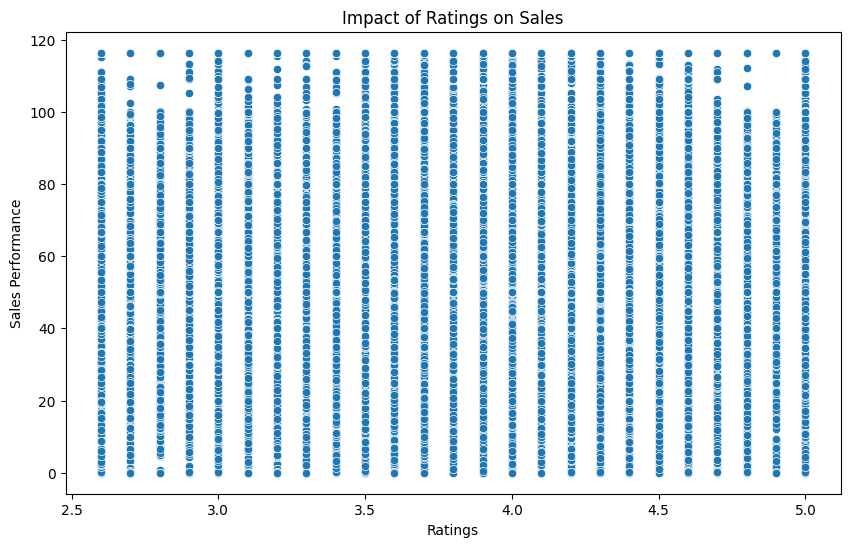

In [140]:
# Create a scatter plot to analyze the correlation between ratings and sales_per
plt.figure(figsize=(10, 6))
sb.scatterplot(data=data, x='ratings', y='sales_per')
plt.title('Impact of Ratings on Sales')
plt.xlabel('Ratings')
plt.ylabel('Sales Performance')
plt.show()
# Explain how ratings impact the sales performance of products.


C:\Users\karth\AppData\Local\Temp\ipykernel_21976\3417676179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data, y='main_category',palette='rainbow', order=data['main_category'].value_counts().index)


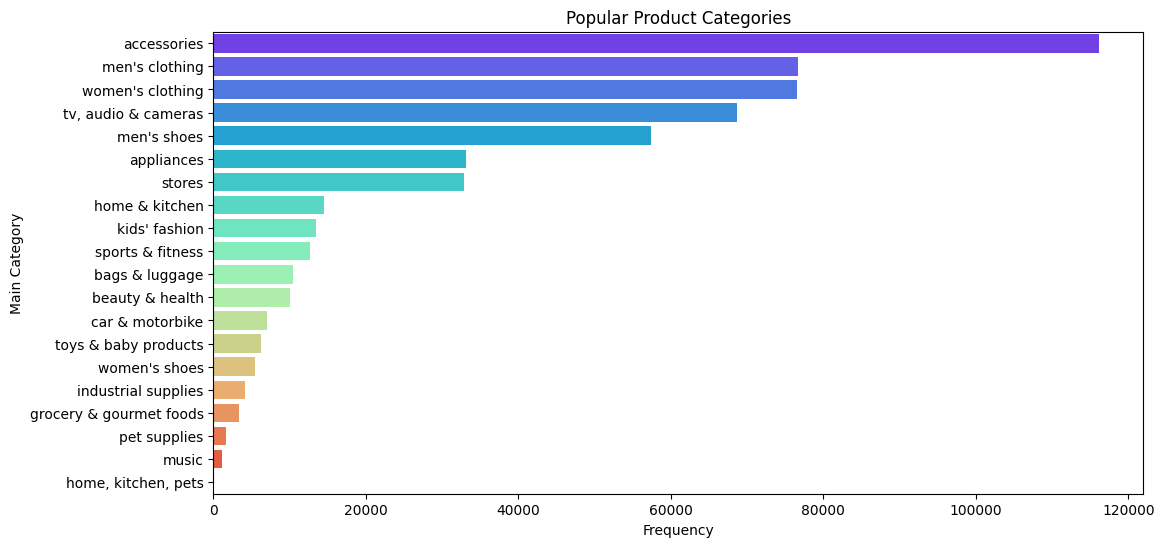

In [141]:
# Create a count plot to show the frequency of each main_category
plt.figure(figsize=(12, 6))
sb.countplot(data=data, y='main_category',palette='rainbow', order=data['main_category'].value_counts().index)
plt.title('Popular Product Categories')
plt.xlabel('Frequency')
plt.ylabel('Main Category')
plt.show()
# Explain which main categories are the most popular based on frequency.


C:\Users\karth\AppData\Local\Temp\ipykernel_21976\1320115216.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=unique_products_per_category, x='name', y='main_category',palette='rainbow')


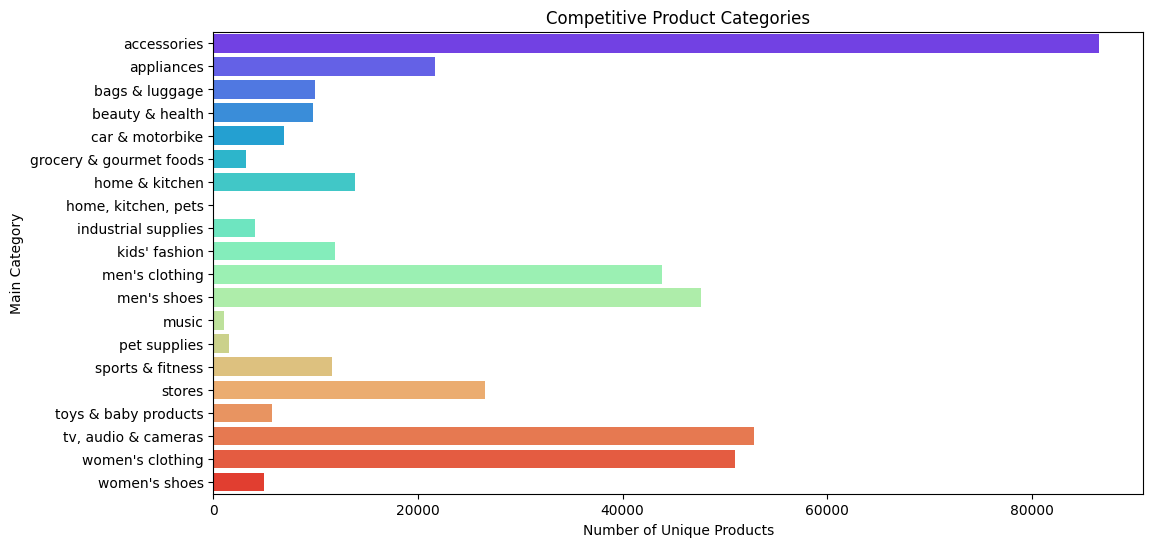

In [142]:
# Create a count plot to show the number of unique products or sellers within each main_category
unique_products_per_category = data.groupby('main_category')['name'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(data=unique_products_per_category, x='name', y='main_category',palette='rainbow')
plt.title('Competitive Product Categories')
plt.xlabel('Number of Unique Products')
plt.ylabel('Main Category')
plt.show()
# Explain which main categories are the most competitive based on the number of unique products.


C:\Users\karth\AppData\Local\Temp\ipykernel_21976\2934908294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=avg_ratings_by_category, x='ratings', y='main_category',palette='rainbow')


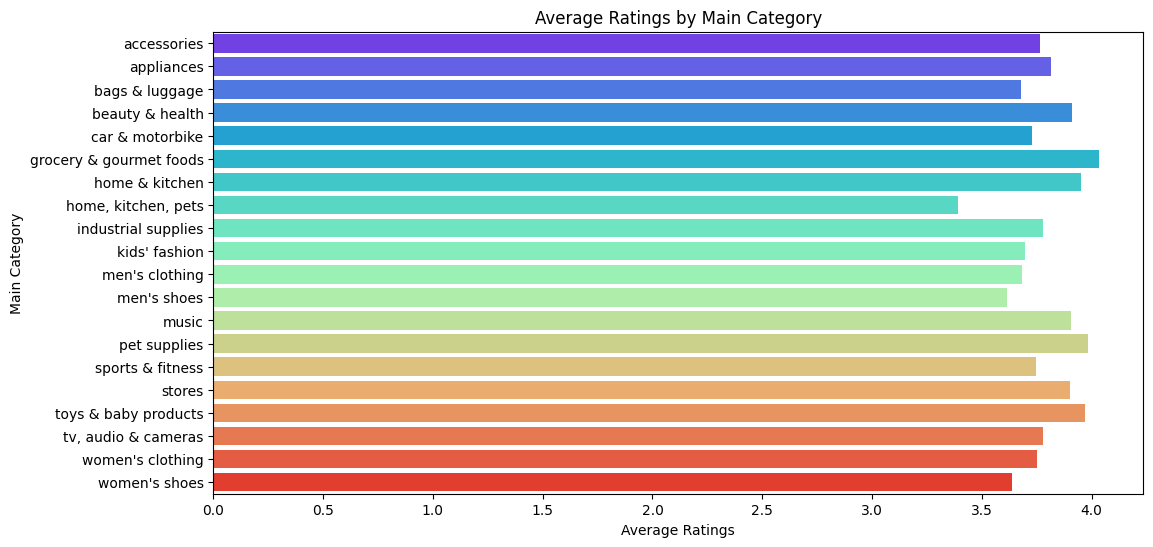

In [143]:
# Create a bar chart to show the average ratings by main_category
avg_ratings_by_category = data.groupby('main_category')['ratings'].mean().reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(data=avg_ratings_by_category, x='ratings', y='main_category',palette='rainbow')
plt.title('Average Ratings by Main Category')
plt.xlabel('Average Ratings')
plt.ylabel('Main Category')
plt.show()
# Explain the relationship between average ratings and main categories.


In [144]:
data.columns

Index(['name', 'Brand_Name', 'main_category', 'sub_category', 'actual_price',
       'discount_price', 'Discount_Offered', 'Discount_per', 'sales_per',
       'ratings', 'Rating_level', 'no_of_ratings'],
      dtype='object')

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\1954613766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=top_5_categories, x='sales_per', y='main_category',palette='rainbow')


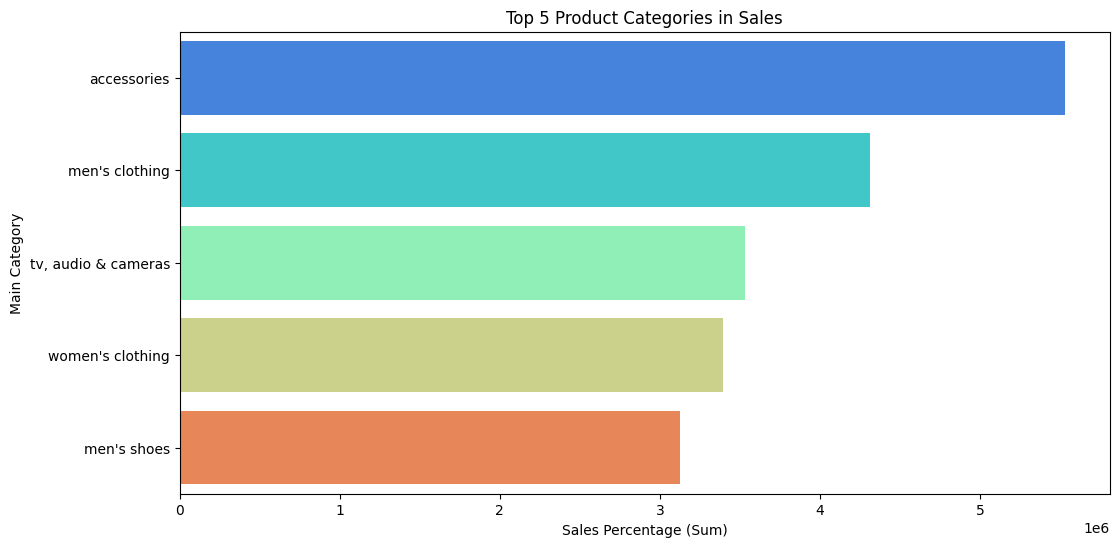

In [145]:
# Create a bar chart to show the top 5 main_category by sales_metric
top_5_categories = data.groupby('main_category')['sales_per'].sum().nlargest(5).reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(data=top_5_categories, x='sales_per', y='main_category',palette='rainbow')
plt.title('Top 5 Product Categories in Sales')
plt.xlabel('Sales Percentage (Sum)')
plt.ylabel('Main Category')
plt.show()
# Explain the top 5 main categories with the highest sales_metric.


C:\Users\karth\AppData\Local\Temp\ipykernel_21976\2168414431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=least_5_categories, x='sales_per', y='main_category',palette='rainbow')


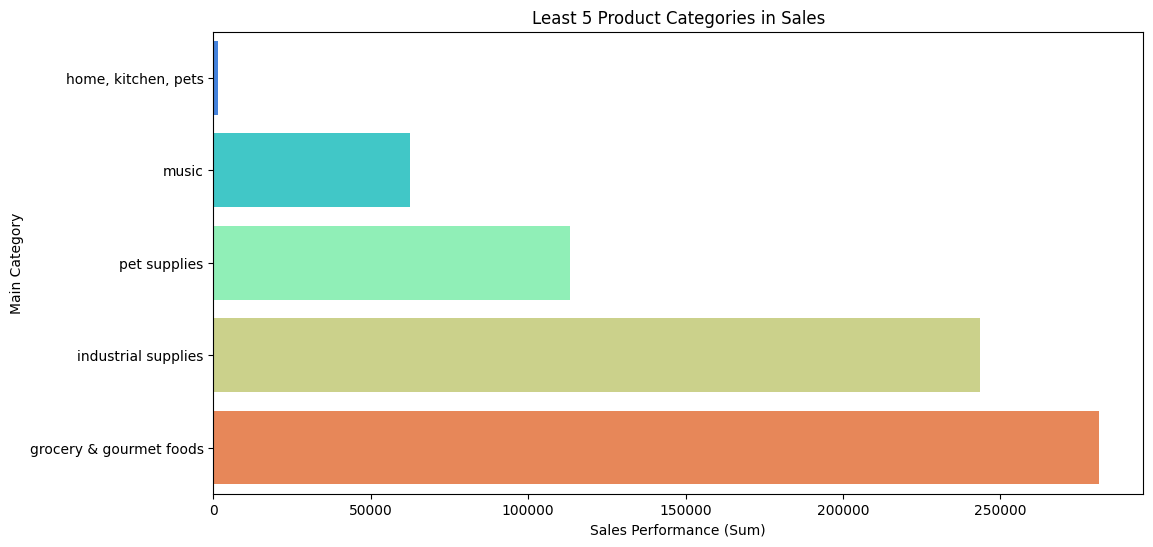

In [146]:
# Create a bar chart to show the least 5 main_category by sales_metric
least_5_categories = data.groupby('main_category')['sales_per'].sum().nsmallest(5).reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(data=least_5_categories, x='sales_per', y='main_category',palette='rainbow')
plt.title('Least 5 Product Categories in Sales')
plt.xlabel('Sales Performance (Sum)')
plt.ylabel('Main Category')
plt.show()
# Explain the least 5 main categories with the lowest sales_metric.


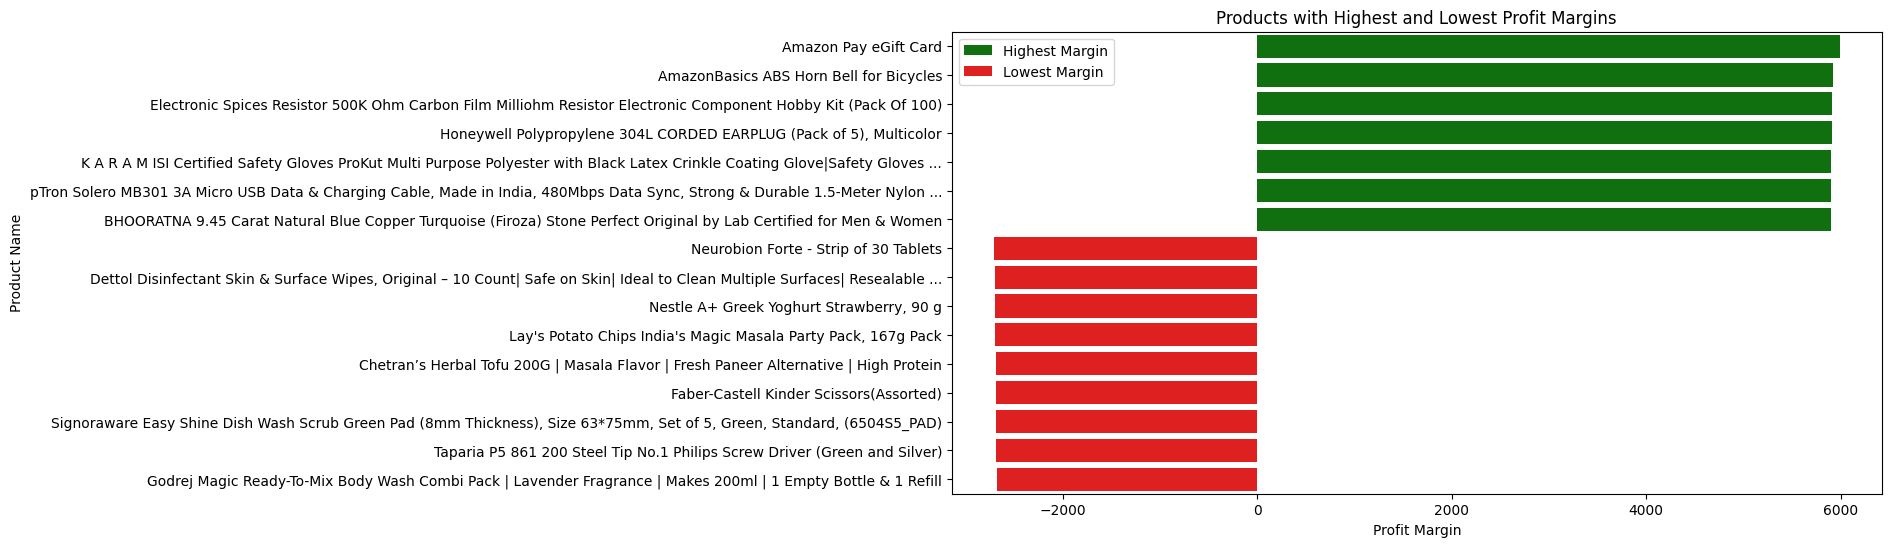

In [147]:
# Calculate profit margins and create a bar chart or list products with the highest and lowest margins
data['profit_margin'] = data['actual_price'] - data['discount_price']
highest_margin_products = data.nlargest(10, 'profit_margin')
lowest_margin_products = data.nsmallest(10, 'profit_margin')
plt.figure(figsize=(12, 6))
sb.barplot(data=highest_margin_products, x='profit_margin', y='name', color='green', label='Highest Margin')
sb.barplot(data=lowest_margin_products, x='profit_margin', y='name', color='red', label='Lowest Margin')
plt.title('Products with Highest and Lowest Profit Margins')
plt.xlabel('Profit Margin')
plt.ylabel('Product Name')
plt.legend()
plt.show()
# Explain the products with the highest and lowest profit margins.



C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


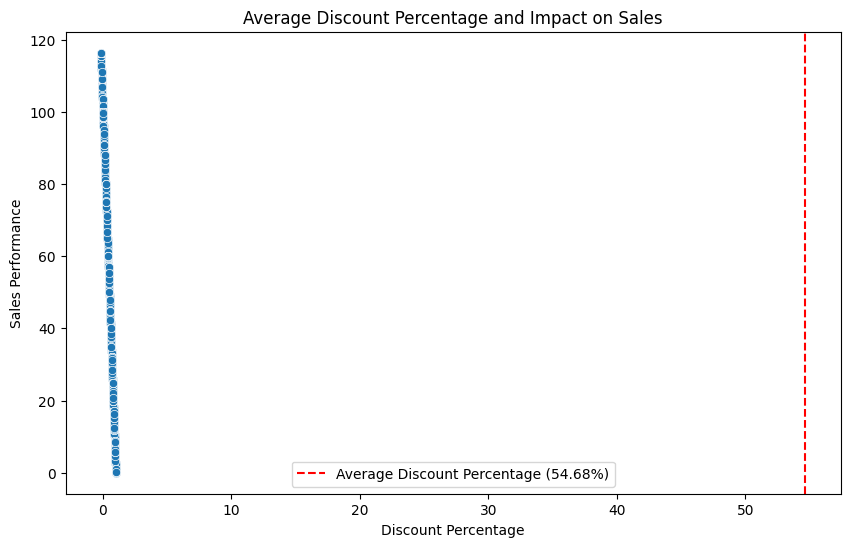

In [148]:
# Calculate average discount percentage for products and analyze its impact on sales_metric
avg_discount_percentage = (data['discount_price'] / data['actual_price']).mean() * 100
plt.figure(figsize=(10, 6))
sb.scatterplot(data=data, x='Discount_per', y='sales_per')
plt.axvline(x=avg_discount_percentage, color='red', linestyle='--', label=f'Average Discount Percentage ({avg_discount_percentage:.2f}%)')
plt.title('Average Discount Percentage and Impact on Sales')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Performance')
plt.legend()
plt.show()
# Explain the relationship between discount percentage and sales_metric.


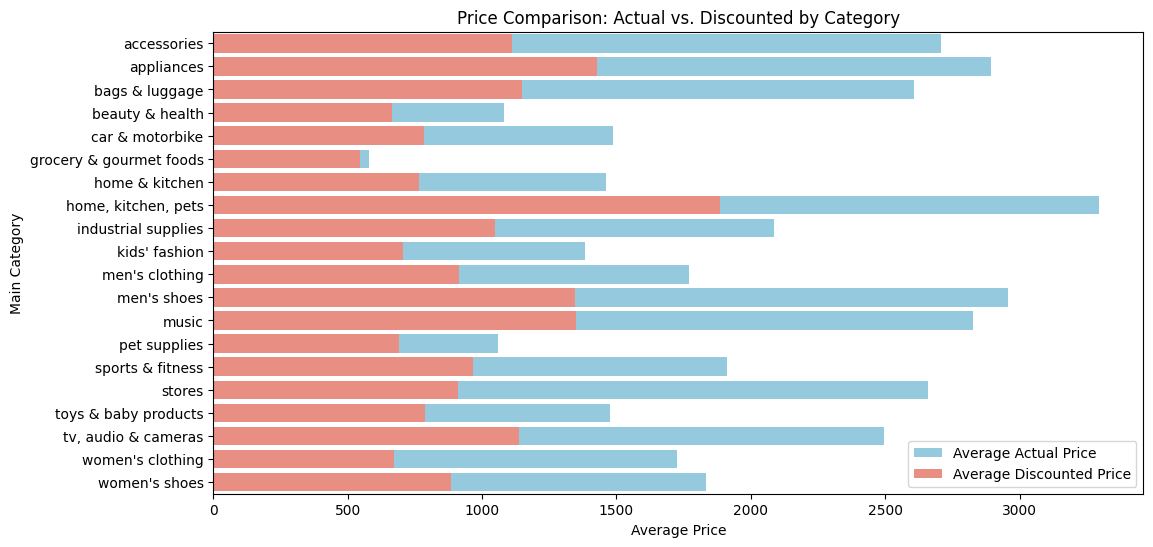

In [149]:
# Create a bar chart to compare the average actual prices and discounted prices by main_category
avg_actual_prices = data.groupby('main_category')['actual_price'].mean().reset_index()
avg_discounted_prices = data.groupby('main_category')['discount_price'].mean().reset_index()
plt.figure(figsize=(12, 6), FigureClass=plt.figure)

sb.barplot(data=avg_actual_prices, x='actual_price', y='main_category', label='Average Actual Price', color='skyblue')
sb.barplot(data=avg_discounted_prices, x='discount_price', y='main_category', label='Average Discounted Price', color='salmon')
plt.title('Price Comparison: Actual vs. Discounted by Category')
plt.xlabel('Average Price')
plt.ylabel('Main Category')
plt.legend()
plt.show()
# Explain how actual prices compare to discounted prices by category.


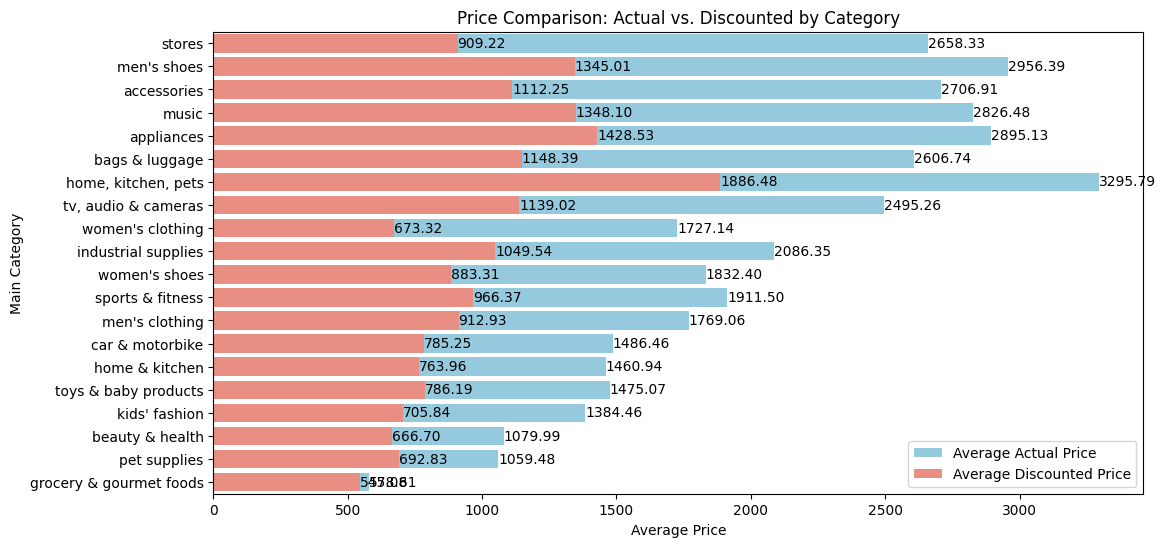

In [150]:
avg_actual_prices = data.groupby('main_category')['actual_price'].mean().reset_index()
avg_discounted_prices = data.groupby('main_category')['discount_price'].mean().reset_index()

avg_price_diff = avg_actual_prices['actual_price'] - avg_discounted_prices['discount_price']
avg_price_diff_df = pd.DataFrame({'main_category': avg_actual_prices['main_category'], 'avg_price_diff': avg_price_diff})

max_diff_category = avg_price_diff_df.loc[avg_price_diff_df['avg_price_diff'].idxmax(), 'main_category']

plt.figure(figsize=(12, 6))

# Define the order of categories based on average price difference
order = avg_price_diff_df.sort_values(by='avg_price_diff', ascending=False)['main_category']

# Plotting average actual prices
ax = sb.barplot(data=avg_actual_prices, x='actual_price', y='main_category',order=order ,label='Average Actual Price', color='skyblue')

# Plotting average discounted prices
sb.barplot(data=avg_discounted_prices, x='discount_price', y='main_category', order=order,label='Average Discounted Price', color='salmon')

# Adding annotations for actual prices
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', color='black', fontsize=10)

plt.title('Price Comparison: Actual vs. Discounted by Category')
plt.xlabel('Average Price')
plt.ylabel('Main Category')
plt.legend()
plt.show()

## Multi variate analysis

In [151]:
numeric_columns=data.select_dtypes(include="number").columns

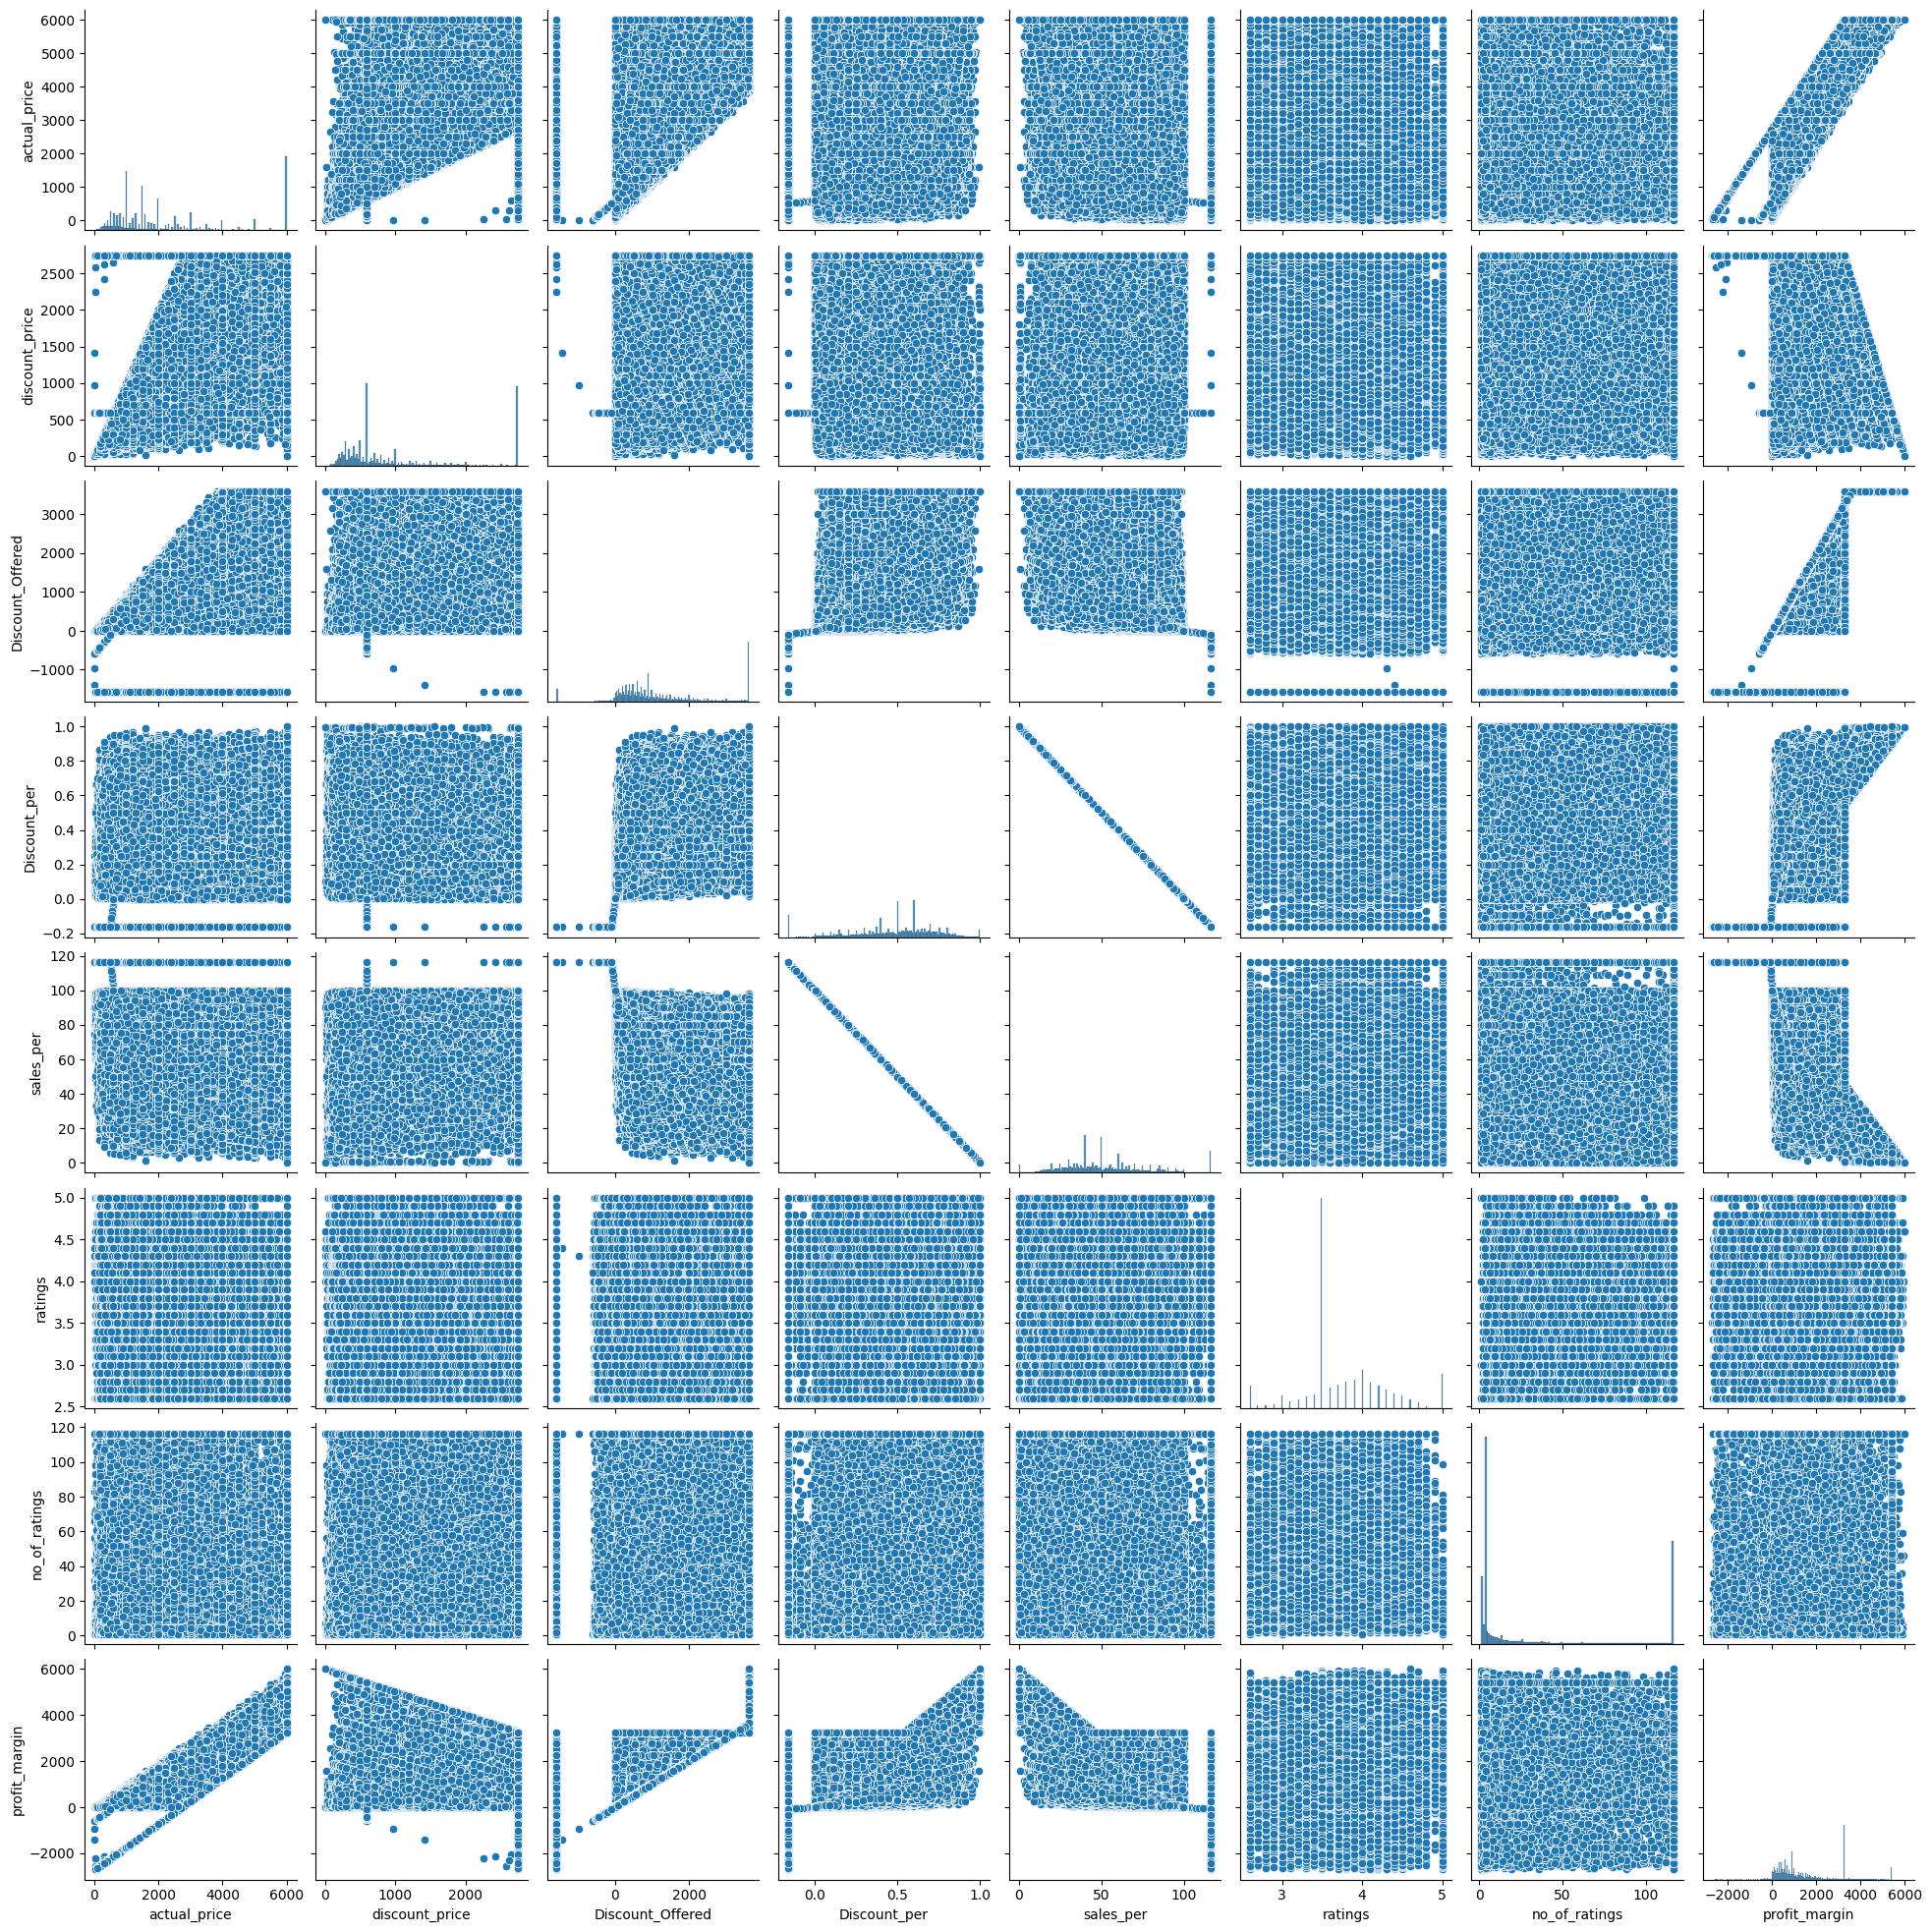

In [152]:
sb.pairplot(data[numeric_columns])

In [153]:
numeric_columns = data.select_dtypes(include="number").columns
print(numeric_columns)


Index(['actual_price', 'discount_price', 'Discount_Offered', 'Discount_per',
       'sales_per', 'ratings', 'no_of_ratings', 'profit_margin'],
      dtype='object')


<Axes: >

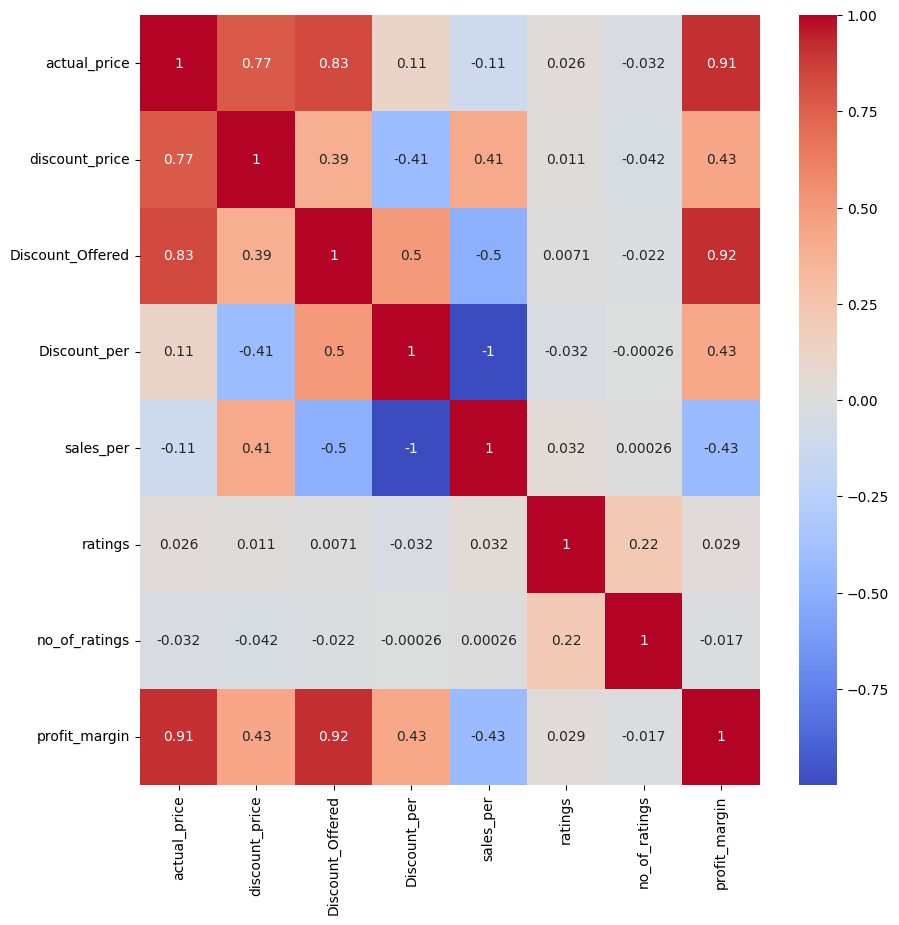

In [154]:
corr = data[numeric_columns].corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr, annot=True, cmap='coolwarm')


## Distribution

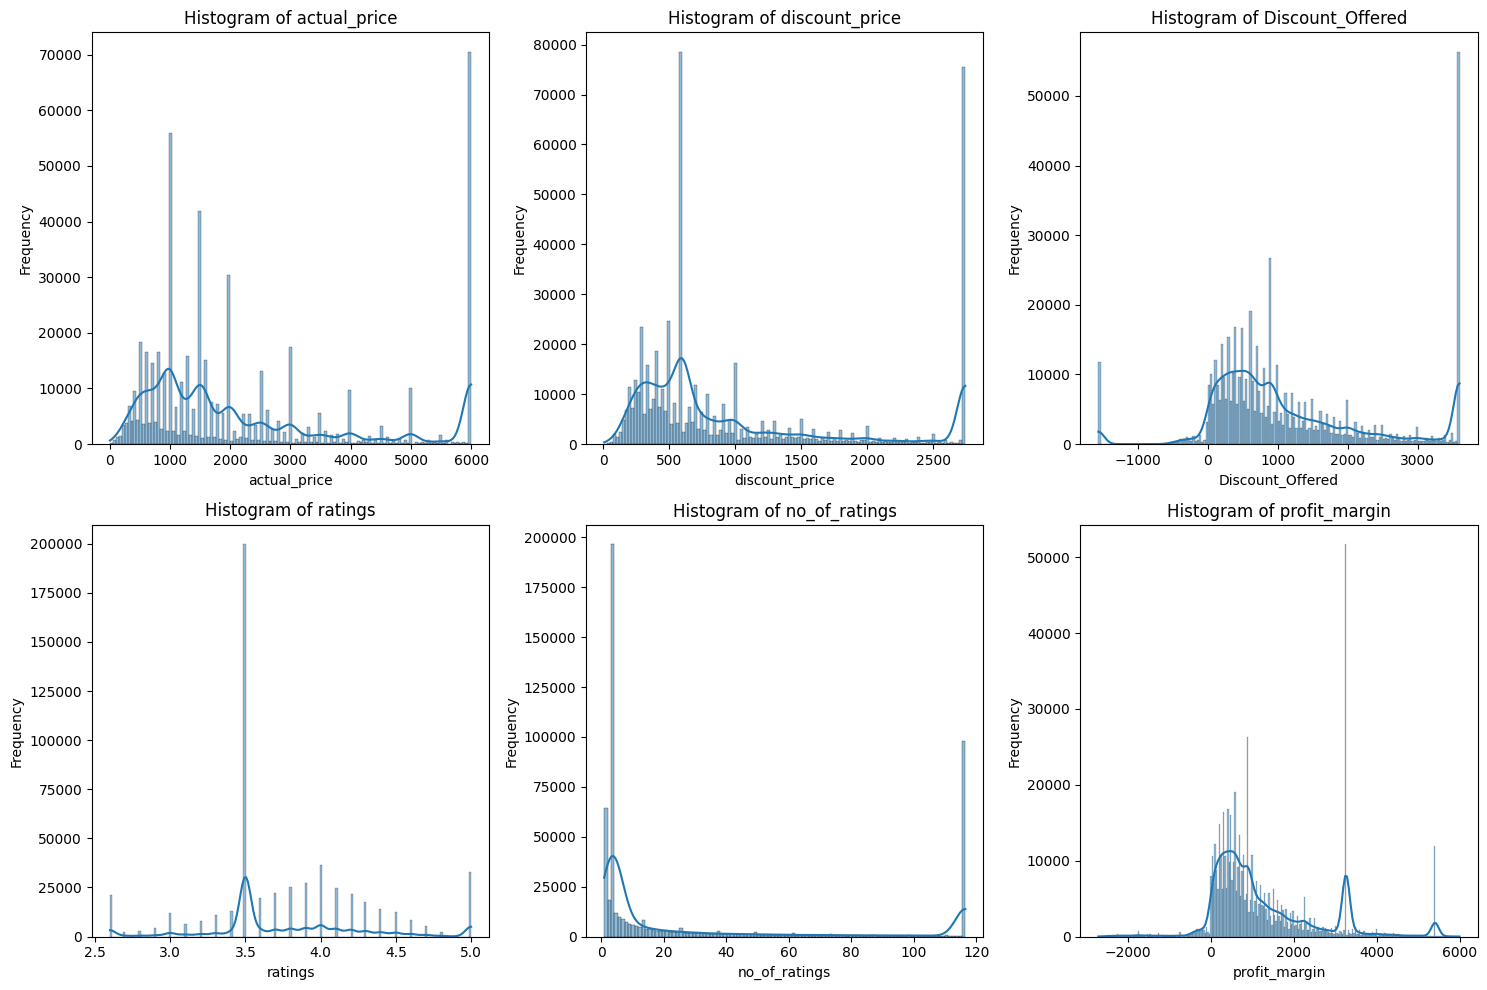

In [155]:
numerical_columns = ['actual_price', 'discount_price', 'Discount_Offered', 'ratings', 'no_of_ratings', 'profit_margin']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Define the layout of subplots

for i, column in enumerate(numerical_columns):
    row = i // 3  # Calculate the row for the subplot
    col = i % 3   # Calculate the column for the subplot
    sb.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Log Transformations

In [156]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log transformation for skewed numerical columns
data['log_ratings'] = data['ratings'].apply(lambda x: np.log(x) if x > 0 else 0)
data['log_discount_price'] = data['discount_price'].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling features for analysis (important for PCA, t-SNE, clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['log_ratings', 'log_discount_price', 'actual_price', 'Discount_Offered', 'profit_margin']])


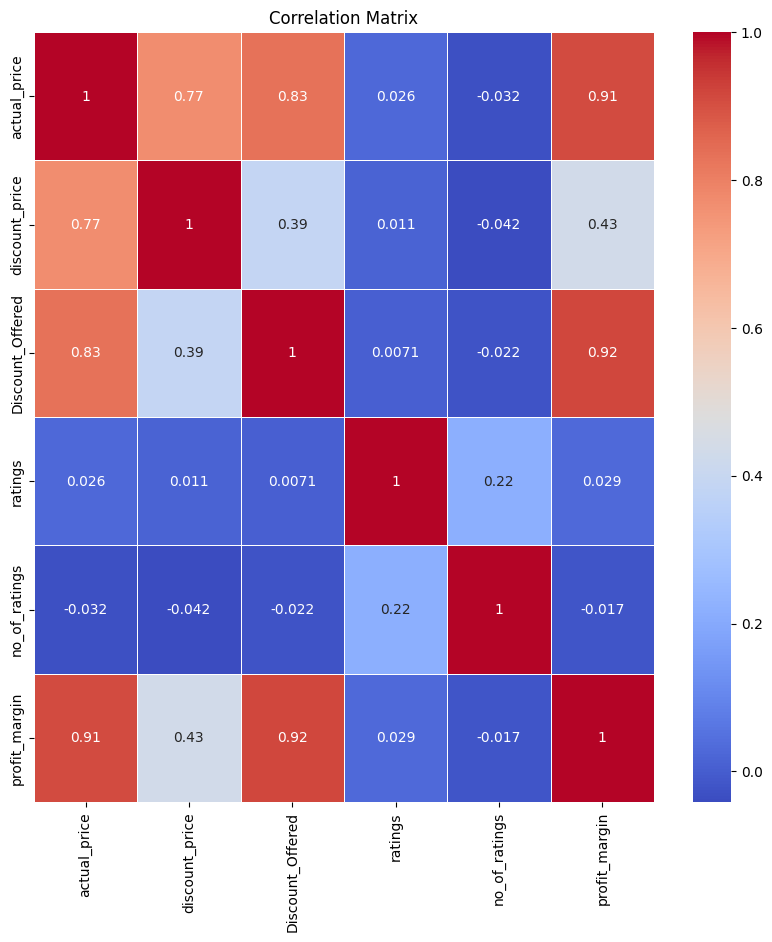

C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


            Feature        VIF
0      actual_price        inf
1    discount_price        inf
2  Discount_Offered  12.294491
3           ratings   3.410724
4     no_of_ratings   1.602175
5     profit_margin        inf


C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [157]:
# Correlation matrix for multicollinearity detection
corr = data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(data[numerical_columns].values, i) for i in range(len(numerical_columns))]

print(vif_data)  # Higher VIF (> 10) suggests multicollinearity


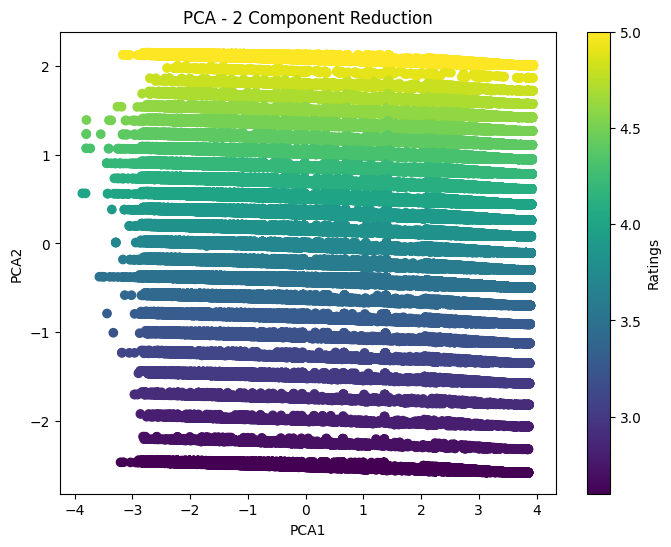

Explained variance by components: [0.63004284 0.19990952]


In [158]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensionality and visualize feature interactions
pca = PCA(n_components=2)  # Reducing to 2 components
pca_result = pca.fit_transform(scaled_data)

# Adding PCA results to the dataset for visualization
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualizing PCA results
plt.figure(figsize=(8,6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['ratings'], cmap='viridis')
plt.colorbar(label='Ratings')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - 2 Component Reduction')
plt.show()

# Explained variance ratio (to understand how much variance is captured)
print(f"Explained variance by components: {pca.explained_variance_ratio_}")


In [159]:
import scipy.stats as stats

# Normality test for log-transformed ratings and discount price
print("Normality test for log_ratings:", stats.normaltest(data['log_ratings']))
print("Normality test for log_discount_price:", stats.normaltest(data['log_discount_price']))

# Other features like actual_price can be similarly tested


Normality test for log_ratings: NormaltestResult(statistic=np.float64(3770.009681021775), pvalue=np.float64(0.0))
Normality test for log_discount_price: NormaltestResult(statistic=np.float64(22217.72913214297), pvalue=np.float64(0.0))


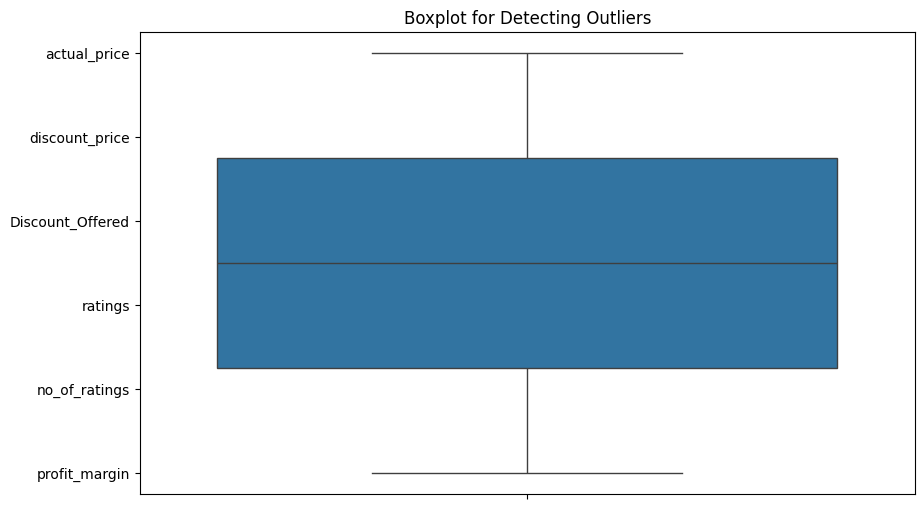

In [160]:
# Box plot to visualize outliers
plt.figure(figsize=(10,6))
sb.boxplot(data=numerical_columns)
plt.title('Boxplot for Detecting Outliers')
plt.show()


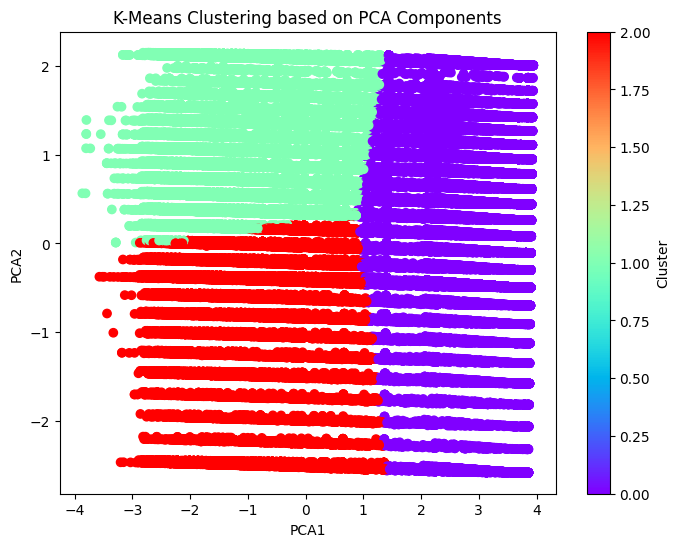

In [161]:
from sklearn.cluster import KMeans

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing clusters with PCA components
plt.figure(figsize=(8,6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='rainbow')
plt.colorbar(label='Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering based on PCA Components')
plt.show()


In [ ]:
# Pair plot to visualize relationships and interactions
sb.pairplot(data[['log_ratings', 'log_discount_price', 'actual_price', 'Discount_Offered', 'profit_margin', 'Cluster']], hue='Cluster')
plt.show()


## Insight
##### Here by seeing the graph, we can say that non of the graph is normally distributed

##### Actual_price, Discount_price, Discount_Offered, Ratings, No.of_ratings have right skewed data distribution because, we can observe that the frequency of the data is high in right hand side of graph

In [163]:
for column in numerical_columns:
    print(f"Statistics for {column}:")
    print(f"Mean: {data[column].mean()}")
    print(f"Median: {data[column].median()}")
    print(f"Standard Deviation: {data[column].std()}\n")

Statistics for actual_price:
Mean: 2273.2389967094828
Median: 1499.0
Standard Deviation: 1816.4056513326805

Statistics for discount_price:
Mean: 1013.372029696239
Median: 599.0
Standard Deviation: 842.3925436191876

Statistics for Discount_Offered:
Mean: 1148.4944043075864
Median: 802.0
Standard Deviation: 1165.1085040149635

Statistics for ratings:
Mean: 3.755463981072726
Median: 3.5
Standard Deviation: 0.5374235801895199

Statistics for no_of_ratings:
Mean: 32.35141637281652
Median: 4.0
Standard Deviation: 44.04783396922009

Statistics for profit_margin:
Mean: 1259.8669670132438
Median: 850.0
Standard Deviation: 1286.9314144607563



## Insight
##### By using these statistical measures, we surely conclude that the data is distributes positive in the entire data set.
##### Because we observe that mean value is greater than median
##### According to positive skewness order of statistical measures
##### mode< median< mean

In [164]:
import scipy.stats as stats

In [165]:
# Identify distribution types
for column in numerical_columns:
    print(f"Distribution type for {column}: {stats.normaltest(data[column])}")


Distribution type for actual_price: NormaltestResult(statistic=np.float64(71328.19009633732), pvalue=np.float64(0.0))
Distribution type for discount_price: NormaltestResult(statistic=np.float64(80501.54805452723), pvalue=np.float64(0.0))
Distribution type for Discount_Offered: NormaltestResult(statistic=np.float64(43129.065936540464), pvalue=np.float64(0.0))
Distribution type for ratings: NormaltestResult(statistic=np.float64(17967.26587022675), pvalue=np.float64(0.0))
Distribution type for no_of_ratings: NormaltestResult(statistic=np.float64(88277.43134758572), pvalue=np.float64(0.0))
Distribution type for profit_margin: NormaltestResult(statistic=np.float64(96058.19914522018), pvalue=np.float64(0.0))


In [166]:
data['normalized_ratings'] = data['ratings'].apply(lambda x: np.log(x) if x > 0 else 0)


In [167]:
print(f"Distribution type for normalized_ratings: {stats.normaltest(data['normalized_ratings'])}")


Distribution type for normalized_ratings: NormaltestResult(statistic=np.float64(3770.009681021775), pvalue=np.float64(0.0))


In [168]:
data['normalized_discount_price'] = data['discount_price'].apply(lambda x: np.log(x) if x > 0 else 0)


In [169]:
print(f"Distribution type for normalized_ratings: {stats.normaltest(data['normalized_discount_price'])}")


Distribution type for normalized_ratings: NormaltestResult(statistic=np.float64(22217.72913214297), pvalue=np.float64(0.0))


## Hypothesis Testing
 #### The ANOVA (Analysis of Variance) test is a way to find out if survey or experiment results are significant

### Outputs
##### F-statistics:  Ratio of the variance between the groups to the variance within the groups

##### P-value: Probability of obtainging an F-statistic extreme than the observed value

#### A comparison of average sales percentages across different main categories using ANOVA test.

##### we only get the result for "Is there any significant differance betweeen each group"

## Assumptions
###### Null hypothesis: There’s no difference in the means of brands
###### Alternative hypothesis: Theres is a differnace in the means of brands

In [170]:
# Group the data by main category and calculate the mean sales percentage by each main category
main_cat_groups = data.groupby('main_category')['sales_per'].mean()

# Perform ANOVA test
f_val, p_val = stats.f_oneway(*[data.loc[data['main_category'] == category, 'sales_per'] for category in main_cat_groups.index])
#  "*" is used for unpacking the list of series into separate arguments 
# here we are only selecting the rows that is equal to category(loc used to select a subset of the dataframe based on certain condition)

f_val, p_val

(np.float64(1797.4265173063473), np.float64(0.0))

##### Here we perform the one way ANOVA test, which tests the null hypothesis that two or more groups have the same populaltion mean.

In [171]:
print(p_val)

0.0


In [172]:
if p_val<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


#### So , we conclude that there is a differance in the means of the main categories


## 2. T-TEST
#### performing a two-sample t-test to compare the average discount offered on products between Brand A and Brand 

In [173]:
brand_list=list(data['Brand_Name'].unique())
['Lloyd', 'LG', 'Carrier', 'Voltas', 'Daikin', 'Panasonic', 'Whirlpool', 'Samsung', 'Godrej', 'Blue', 'IFB', 'Cruise', 'AmazonBasics', 'Haier', 'Hitachi', 'Amazon', 
 'OGENERAL', 'Small', 'ALLWIN', 'Hexzone', 'Candy', 'O-General', 'ONIDA']
# print(brand_list)
print("Select any two from above")
Brand_A = input("Enter Brand A name(Check Capitals and small letters): ")
Brand_B = input("Enter Brand B name(Check Capitals and small letters): ")

if Brand_A in brand_list and Brand_B in brand_list:
     brand_a_data = data[data['Brand_Name'] == Brand_A]
      brand_b_data = data[data['Brand_Name'] == Brand_B]
     
     # Extract the discount offered for each brand
     discount_offered_a = brand_a_data['Discount_Offered']
     discount_offered_b = brand_b_data['Discount_Offered']
     
     # Perform the two-sample t-test
     t_statistic, p_value =stats.ttest_ind(discount_offered_a, discount_offered_b)
     
     # Print the results
     print('t-statistic:', t_statistic)
     print('p-value:', p_value)
     
     # Interpret the results
     if p_value < 0.05:
         print('There is a significant difference in the average discount offered on products between Brand A ({}) and Brand B ({}).'.format(Brand_A, Brand_B))
     else:
         print('There is no significant difference in the average discount offered on products between Brand A ({}) and Brand B ({}).'.format(Brand_A, Brand_B))
     

else:
    print("Give the brand names correctly, please go throught the list once again")

Select any two from above


Enter Brand A name(Check Capitals and small letters):  Pc
Enter Brand B name(Check Capitals and small letters):  Puma


t-statistic: -0.9164888334793503
p-value: 0.35945502023023657
There is no significant difference in the average discount offered on products between Brand A (Pc) and Brand B (Puma).


C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


### Conclusion
##### if the p_val is lessthan 0.05 then
######   statistically, the two brands offer similar discounts on their products
##### else
######   statistically, the two brands does not offer similar discounts on their products

## 3. PEARSON CORRELATION

In [174]:
# Perform the Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(data['sales_per'], data['no_of_ratings'])

# Print the results
print('Correlation coefficient:', correlation_coefficient)
print('p-value:', p_value)

if abs(correlation_coefficient) > 0.3 and p_value < 0.05:
    print('There is a weak to moderate significant relationship between the average sales percentage product and the number of ratings a product has.')
elif abs(correlation_coefficient) > 0.5 and p_value < 0.05:
    print('There is a moderate to strong significant relationship between the average sales percentage product and the number of ratings a product has.')
elif abs(correlation_coefficient) > 0.8 and p_value < 0.05:
    print('There is a strong significant relationship between the average sales percentage product and the number of ratings a product has.')
else:
    print('There is no significant relationship between the average sales percentage product and the number of ratings a product has.')


Correlation coefficient: 0.0002578443267975152
p-value: 0.8481359362952365
There is no significant relationship between the average sales percentage product and the number of ratings a product has.


##### The correlation coefficient measures the strength and direction of the linear relationship between two variables

## CENTRAL LIMIT THEOREM

In [175]:
df= data[['ratings']]
df

ratings
0           4.2
1           4.2
2           4.2
3           4.0
4           4.1
...         ...
551580      3.2
551581      2.6
551582      4.0
551583      4.4
551584      4.6

[551585 rows x 1 columns]

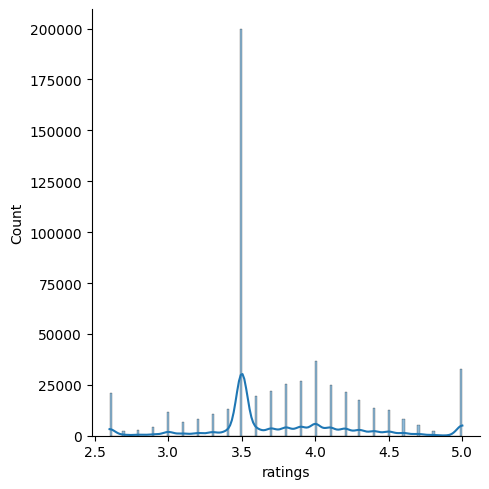

In [176]:
sb.displot(df.ratings,kde=True)
plt.show()

### Population Mean

In [177]:
df.ratings.mean()

np.float64(3.755463981072726)

##### This is the true mean weight of the population. This is the population parameter, the ground truth.

##### Let's take a random sample from this data, and see what mean we get.

### Sample Mean

In [178]:
sample_size= 30

In [179]:
df.ratings.sample(sample_size).mean()

np.float64(3.9200000000000004)


##### Slight different from the population mean, right?
##### Let's take another sample.

In [180]:
df.ratings.sample(sample_size).mean()

np.float64(3.72)

In [181]:
df.ratings.sample(sample_size).mean()

np.float64(3.7633333333333336)

In [182]:
##### Each time we take a sample, our mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let's assess this.
##### We'll take many samples from the data, and plot a histogram of the same.

In [183]:
sample_means = [df.ratings.sample(sample_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

C:\Users\karth\AppData\Local\Temp\ipykernel_21976\2426809856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(sample_means)


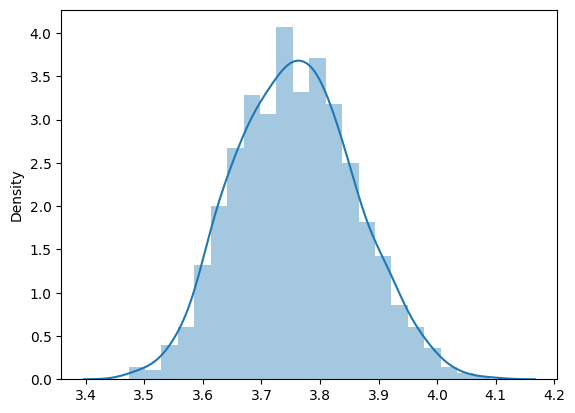

In [184]:
sb.distplot(sample_means)
plt.show()

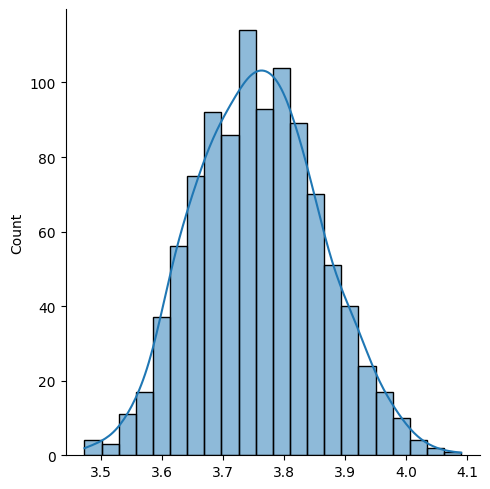

In [185]:
sb.displot(sample_means,kde=True)
plt.show()

##### It is a distribution of sample means, which is a histogram with a Kernel Density Estimate (KDE) overlay. This type of distribution is known as a Sampling Distribution.

##### From the plot, it appears that the distribution of sample means follows a Normal Distribution (also known as a Gaussian Distribution), which is characterized by its bell shape and symmetry around the mean. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approximate a normal distribution as the sample size becomes large, regardless of the shape of the population distribution.

##### The mean of this distribution is approximately 3.75, which is the peak of the bell curve. This suggests that the average rating across all samples is around 3.75. The spread of the distribution gives us an idea about the variability of the ratings. The narrower the bell curve, the less variability there is in the ratings.

### Mean of the sample means

In [186]:
sample_means.mean()

np.float64(3.757843333333333)

### Standard deviation of your sample means

In [187]:
sample_means.std()

np.float64(0.10148197783428586)

## standard error of the population
### Population std vs. std of sampling mean

In [188]:
df.ratings.std()/np.sqrt(sample_size)

np.float64(0.09811967260166218)

## CONCLUSION
#### The values were very close, which supports the CLT. This implies that the sample means provide a good estimate of the population mean, and the spread of the sample means around this estimate is captured by the standard deviation of the sample means (or equivalently, the standard error of the population).

#### The analysis provides evidence that the ‘ratings’ data is well-behaved and suitable for statistical inference